<a href="https://colab.research.google.com/github/HassanSherwani/Telcom_Churn-End-End-Project-/blob/master/Assignment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
# I am an engineer. I care only about error not warning. So, let's be maverick and ignore warnings.
import warnings
warnings.filterwarnings('ignore')

In [0]:
#support both Python 2 and Python 3 with minimal overhead.
from __future__ import absolute_import, division, print_function

In [0]:
# What's life without style :). So, let's add style to our dataframes
#from IPython.core.display import HTML
#css = open('style-table.css').read() + open('style-notebook.css').read()
#HTML('<style>{}</style>'.format(css))

In [624]:
#For Visuals
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
from matplotlib import rcParams
rcParams['figure.figsize'] = 11, 8
%config InlineBackend.figure_format = 'svg'
%matplotlib inline
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [0]:
# For processing and maths
import numpy as np
import pandas as pd
import tensorflow as tf
import datetime as dt
import requests
import pickle


In [0]:
# For modeling building and tunning
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import Imputer
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

In [0]:
# To evaluate
from sklearn.metrics import accuracy_score
from sklearn.metrics import recall_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

In [628]:
df_telcom =pd.read_csv('Telecom.csv')
df_telcom.head()

,Unnamed: 0,Customer.ID,Years.customer,Months.customer,Minutes.in.2018,Minutes.onnet,Minutes.offnet,Number.of.SMS,KBs.used,Total.Unique.Calls,Previous.provider,Churn.Status
0,1,ADF1259,3805,126.83,4091.6160,1436.324929,2655.291071,81,3.624375e+03,117,KPN,0
1,2,ADF1192,2905,96.83,3179.2800,1949.967368,1229.312632,101,5.518428e+05,106,Telfort,0
2,3,ADF1501,3819,127.30,7233.1824,949.015084,6284.167316,79,2.128473e+06,94,TELE2,0
3,4,ADF1762,3643,121.43,7336.1760,1765.167079,5571.008921,121,2.180738e+04,450,Ben,1
4,5,ADF1345,3809,126.97,5390.9400,3519.060527,1871.879473,16,4.648857e+05,308,TELE2,0


In [629]:
df_telcom.shape

(1200, 12)

In [0]:
df_telcom = df_telcom.drop(['Unnamed: 0'], axis=1)

In [631]:
df_telcom.shape

(1200, 11)

In [632]:
df_fin =pd.read_csv('Finance.csv')
df_fin.head()

,Unnamed: 0,Customer.ID,Key,Value
0,1,ADF0038,PricePhone,399.181002
1,2,ADF0038,MonthlySubscriptionPrice,49.244972
2,3,ADF0038,PaidAfterPaymentDate,1.000000
3,4,ADF0039,PricePhone,4.826688
4,5,ADF0039,MonthlySubscriptionPrice,33.292264


In [633]:
df_fin.shape

(3606, 4)

In [0]:
df_fin = df_fin.drop(['Unnamed: 0'], axis=1)

In [635]:
df_fin.shape

(3606, 3)

In [636]:
df_fin['Key'].value_counts()

PaidAfterPaymentDate        1202
PricePhone                  1202
MonthlySubscriptionPrice    1202
Name: Key, dtype: int64

In [637]:
df_cust =pd.read_csv('CustServ.csv', encoding="ISO-8859-1")
df_cust.head()

,Unnamed: 0,Customer.ID,Customer.Age,Customer.Municipality,Latitude,Longitude,Province,LoginsSite.Last.Month,LoginsSite.Last.6Months,EndSubscription,Total.Call.centre.complaint.calls
0,1,ADF1259,44,Utrecht,52.090737,5.121420,Utrecht,6,11,2019-05-08,2
1,2,ADF1192,31,Hoogeveen,52.728616,6.490100,Drenthe,8,12,2019-04-16,2
2,3,ADF1501,35,Oosterhout,51.641020,4.861690,Noord-Brabant,6,8,2019-05-24,3
3,4,ADF1762,54,Amsterdam,52.370216,4.895168,Noord-Holland,5,14,2019-03-27,1
4,5,ADF1345,53,Zundert,51.470702,4.662356,Noord-Brabant,7,9,2019-03-24,2


In [638]:
df_cust.shape

(1200, 11)

In [0]:
df_cust = df_cust.drop(['Unnamed: 0'], axis=1)

In [640]:
df_cust.shape

(1200, 10)

In [641]:
df_pilot =pd.read_csv('Pilot_project.csv', encoding="ISO-8859-1")
df_pilot.head()

,Customer.ID,Total.Unique.Calls,Total.Call.centre.complaint.calls,Previous.provider,Customer.Age,Customer.Municipality,PricePhone,MonthlySubscriptionPrice,LoginsSite.Last.Month,LoginsSite.Last.6Months,PaidAfterPaymentDate,Years.customer,Months.customer,Minutes.in.2018,Number.of.SMS,KBs.used,Minutes.offnet,Minutes.onnet,Latitude,Longitude,Province,EndSubscription
0,ADF1345,308,2,TELE2,53,Zundert,267.980610,41.250999,7,9,5,3809,126.97,5390.9400,16,4.648857e+05,1871.879473,3519.060527,51.470702,4.662356,Noord-Brabant,24-3-2019
1,ADF1658,27,1,KPN,76,Eemsmond,305.727018,18.336615,7,16,3,165,5.50,1220.2872,7,3.967471e+05,997.283408,223.003792,53.400344,6.648410,Groningen,24-4-2019
2,ADF0063,138,1,Vodafone,18,Krimpenerwaard,266.660924,45.172294,6,11,2,727,24.23,4395.3528,8,2.528750e+02,1044.632718,3350.720082,51.982222,4.781667,Zuid-Holland,18-6-2019
3,ADF0047,79,2,T-Mobile,46,Rijssen-Holten,489.103383,36.975923,5,12,2,4082,136.07,1573.6800,0,8.673800e+00,476.437555,1097.242445,52.292506,6.439999,Overijssel,25-1-2019
4,ADF1348,660,1,Telfort,18,Zoeterwoude,134.543776,32.380655,5,12,1,1417,47.23,5419.6200,0,2.166780e+06,4331.800248,1087.819752,52.120830,4.516570,Zuid-Holland,8-5-2019


In [642]:
df_pilot.shape

(200, 22)

In [643]:
print(df_pilot.columns)

Index(['Customer.ID', 'Total.Unique.Calls',
       'Total.Call.centre.complaint.calls', 'Previous.provider',
       'Customer.Age', 'Customer.Municipality', 'PricePhone',
       'MonthlySubscriptionPrice', 'LoginsSite.Last.Month',
       'LoginsSite.Last.6Months', 'PaidAfterPaymentDate', 'Years.customer',
       'Months.customer', 'Minutes.in.2018', 'Number.of.SMS', 'KBs.used',
       'Minutes.offnet', 'Minutes.onnet', 'Latitude', 'Longitude', 'Province',
       'EndSubscription'],
      dtype='object')


In [0]:
cust_id=df_pilot["Customer.ID"]

In [645]:
print(cust_id[:3])

0    ADF1345
1    ADF1658
2    ADF0063
Name: Customer.ID, dtype: object


# 3)- Data Exploration starting from telcom data file

In [646]:
print(df_telcom.columns)

Index(['Customer.ID', 'Years.customer', 'Months.customer', 'Minutes.in.2018',
       'Minutes.onnet', 'Minutes.offnet', 'Number.of.SMS', 'KBs.used',
       'Total.Unique.Calls', 'Previous.provider', 'Churn.Status'],
      dtype='object')


In [647]:
print(df_cust.columns)

Index(['Customer.ID', 'Customer.Age', 'Customer.Municipality', 'Latitude',
       'Longitude', 'Province', 'LoginsSite.Last.Month',
       'LoginsSite.Last.6Months', 'EndSubscription',
       'Total.Call.centre.complaint.calls'],
      dtype='object')


### 3.1)- Joining dataframe having same columns.

In [0]:
result = pd.concat([df_telcom, df_cust], axis=1, join_axes=[df_cust.index])

In [649]:
result.head(2)

,Customer.ID,Years.customer,Months.customer,Minutes.in.2018,Minutes.onnet,Minutes.offnet,Number.of.SMS,KBs.used,Total.Unique.Calls,Previous.provider,Churn.Status,Customer.ID,Customer.Age,Customer.Municipality,Latitude,Longitude,Province,LoginsSite.Last.Month,LoginsSite.Last.6Months,EndSubscription,Total.Call.centre.complaint.calls
0,ADF1259,3805,126.83,4091.616,1436.324929,2655.291071,81,3624.3750,117,KPN,0,ADF1259,44,Utrecht,52.090737,5.12142,Utrecht,6,11,2019-05-08,2
1,ADF1192,2905,96.83,3179.280,1949.967368,1229.312632,101,551842.8331,106,Telfort,0,ADF1192,31,Hoogeveen,52.728616,6.49010,Drenthe,8,12,2019-04-16,2


In [650]:
result.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1200 entries, 0 to 1199
Data columns (total 21 columns):
Customer.ID                          1200 non-null object
Years.customer                       1200 non-null int64
Months.customer                      1200 non-null float64
Minutes.in.2018                      1200 non-null float64
Minutes.onnet                        1200 non-null float64
Minutes.offnet                       1200 non-null float64
Number.of.SMS                        1200 non-null int64
KBs.used                             1200 non-null float64
Total.Unique.Calls                   1200 non-null int64
Previous.provider                    1194 non-null object
Churn.Status                         1200 non-null int64
Customer.ID                          1200 non-null object
Customer.Age                         1200 non-null int64
Customer.Municipality                1200 non-null object
Latitude                             1200 non-null float64
Longitude             

In [651]:
result.shape

(1200, 21)

In [0]:
result2 = pd.merge(df_telcom, df_cust, on='Customer.ID')

In [653]:
result2.head(2)

,Customer.ID,Years.customer,Months.customer,Minutes.in.2018,Minutes.onnet,Minutes.offnet,Number.of.SMS,KBs.used,Total.Unique.Calls,Previous.provider,Churn.Status,Customer.Age,Customer.Municipality,Latitude,Longitude,Province,LoginsSite.Last.Month,LoginsSite.Last.6Months,EndSubscription,Total.Call.centre.complaint.calls
0,ADF1259,3805,126.83,4091.616,1436.324929,2655.291071,81,3624.3750,117,KPN,0,44,Utrecht,52.090737,5.12142,Utrecht,6,11,2019-05-08,2
1,ADF1192,2905,96.83,3179.280,1949.967368,1229.312632,101,551842.8331,106,Telfort,0,31,Hoogeveen,52.728616,6.49010,Drenthe,8,12,2019-04-16,2


In [654]:
result2.shape

(1200, 20)

In [655]:
result2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1200 entries, 0 to 1199
Data columns (total 20 columns):
Customer.ID                          1200 non-null object
Years.customer                       1200 non-null int64
Months.customer                      1200 non-null float64
Minutes.in.2018                      1200 non-null float64
Minutes.onnet                        1200 non-null float64
Minutes.offnet                       1200 non-null float64
Number.of.SMS                        1200 non-null int64
KBs.used                             1200 non-null float64
Total.Unique.Calls                   1200 non-null int64
Previous.provider                    1194 non-null object
Churn.Status                         1200 non-null int64
Customer.Age                         1200 non-null int64
Customer.Municipality                1200 non-null object
Latitude                             1200 non-null float64
Longitude                            1200 non-null float64
Province             

In [656]:
set(result2.columns).intersection(set(df_pilot.columns))

{'Customer.Age',
 'Customer.ID',
 'Customer.Municipality',
 'EndSubscription',
 'KBs.used',
 'Latitude',
 'LoginsSite.Last.6Months',
 'LoginsSite.Last.Month',
 'Longitude',
 'Minutes.in.2018',
 'Minutes.offnet',
 'Minutes.onnet',
 'Months.customer',
 'Number.of.SMS',
 'Previous.provider',
 'Province',
 'Total.Call.centre.complaint.calls',
 'Total.Unique.Calls',
 'Years.customer'}

In [657]:
set(df_fin.columns).intersection(set(df_pilot.columns))

{'Customer.ID'}

In [658]:
df_fin.head(2)

,Customer.ID,Key,Value
0,ADF0038,PricePhone,399.181002
1,ADF0038,MonthlySubscriptionPrice,49.244972


### checking Finance dataset

In [659]:
df_fin.Key.value_counts()

PaidAfterPaymentDate        1202
PricePhone                  1202
MonthlySubscriptionPrice    1202
Name: Key, dtype: int64

In [0]:
df_month_sub_price=df_fin[df_fin.Key=="MonthlySubscriptionPrice"]

In [661]:
df_month_sub_price.head()

,Customer.ID,Key,Value
1,ADF0038,MonthlySubscriptionPrice,49.244972
4,ADF0039,MonthlySubscriptionPrice,33.292264
7,ADF0040,MonthlySubscriptionPrice,3.444442
10,ADF0041,MonthlySubscriptionPrice,12.846932
13,ADF0043,MonthlySubscriptionPrice,34.724409


In [0]:
df_month_sub_price.rename(columns={'Customer.ID':'Customer.ID',
                          'Key':'Name_of_package',
                          'Value':'MonthlySubscriptionPrice'}, 
                 inplace=True)

In [663]:
df_month_sub_price.head()

,Customer.ID,Name_of_package,MonthlySubscriptionPrice
1,ADF0038,MonthlySubscriptionPrice,49.244972
4,ADF0039,MonthlySubscriptionPrice,33.292264
7,ADF0040,MonthlySubscriptionPrice,3.444442
10,ADF0041,MonthlySubscriptionPrice,12.846932
13,ADF0043,MonthlySubscriptionPrice,34.724409


In [0]:
result3 = pd.merge(result2, df_month_sub_price, on='Customer.ID')

In [665]:
result3.head()

,Customer.ID,Years.customer,Months.customer,Minutes.in.2018,Minutes.onnet,Minutes.offnet,Number.of.SMS,KBs.used,Total.Unique.Calls,Previous.provider,Churn.Status,Customer.Age,Customer.Municipality,Latitude,Longitude,Province,LoginsSite.Last.Month,LoginsSite.Last.6Months,EndSubscription,Total.Call.centre.complaint.calls,Name_of_package,MonthlySubscriptionPrice
0,ADF1259,3805,126.83,4091.6160,1436.324929,2655.291071,81,3.624375e+03,117,KPN,0,44,Utrecht,52.090737,5.121420,Utrecht,6,11,2019-05-08,2,MonthlySubscriptionPrice,45.640142
1,ADF1192,2905,96.83,3179.2800,1949.967368,1229.312632,101,5.518428e+05,106,Telfort,0,31,Hoogeveen,52.728616,6.490100,Drenthe,8,12,2019-04-16,2,MonthlySubscriptionPrice,21.871447
2,ADF1501,3819,127.30,7233.1824,949.015084,6284.167316,79,2.128473e+06,94,TELE2,0,35,Oosterhout,51.641020,4.861690,Noord-Brabant,6,8,2019-05-24,3,MonthlySubscriptionPrice,28.005670
3,ADF1762,3643,121.43,7336.1760,1765.167079,5571.008921,121,2.180738e+04,450,Ben,1,54,Amsterdam,52.370216,4.895168,Noord-Holland,5,14,2019-03-27,1,MonthlySubscriptionPrice,26.122189
4,ADF1345,3809,126.97,5390.9400,3519.060527,1871.879473,16,4.648857e+05,308,TELE2,0,53,Zundert,51.470702,4.662356,Noord-Brabant,7,9,2019-03-24,2,MonthlySubscriptionPrice,41.250999


In [666]:
result3.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1200 entries, 0 to 1199
Data columns (total 22 columns):
Customer.ID                          1200 non-null object
Years.customer                       1200 non-null int64
Months.customer                      1200 non-null float64
Minutes.in.2018                      1200 non-null float64
Minutes.onnet                        1200 non-null float64
Minutes.offnet                       1200 non-null float64
Number.of.SMS                        1200 non-null int64
KBs.used                             1200 non-null float64
Total.Unique.Calls                   1200 non-null int64
Previous.provider                    1194 non-null object
Churn.Status                         1200 non-null int64
Customer.Age                         1200 non-null int64
Customer.Municipality                1200 non-null object
Latitude                             1200 non-null float64
Longitude                            1200 non-null float64
Province             

In [667]:
result2.shape

(1200, 20)

In [668]:
result3[result3['Customer.ID'] == 'ADF0038']

,Customer.ID,Years.customer,Months.customer,Minutes.in.2018,Minutes.onnet,Minutes.offnet,Number.of.SMS,KBs.used,Total.Unique.Calls,Previous.provider,Churn.Status,Customer.Age,Customer.Municipality,Latitude,Longitude,Province,LoginsSite.Last.Month,LoginsSite.Last.6Months,EndSubscription,Total.Call.centre.complaint.calls,Name_of_package,MonthlySubscriptionPrice
730,ADF0038,117,3.9,298.02,178.297732,119.722268,0,6941.0615,1,Vodafone,0,65,Gulpen-Wittem,50.800934,5.897288,Limburg,4,13,2019-04-24,1,MonthlySubscriptionPrice,49.244972


In [669]:
result3[result3['Customer.ID'] == 'ADF1762']

,Customer.ID,Years.customer,Months.customer,Minutes.in.2018,Minutes.onnet,Minutes.offnet,Number.of.SMS,KBs.used,Total.Unique.Calls,Previous.provider,Churn.Status,Customer.Age,Customer.Municipality,Latitude,Longitude,Province,LoginsSite.Last.Month,LoginsSite.Last.6Months,EndSubscription,Total.Call.centre.complaint.calls,Name_of_package,MonthlySubscriptionPrice
3,ADF1762,3643,121.43,7336.176,1765.167079,5571.008921,121,21807.3848,450,Ben,1,54,Amsterdam,52.370216,4.895168,Noord-Holland,5,14,2019-03-27,1,MonthlySubscriptionPrice,26.122189


In [670]:
df_month_sub_price[df_month_sub_price['Customer.ID'] == 'ADF1762']

,Customer.ID,Name_of_package,MonthlySubscriptionPrice
3160,ADF1762,MonthlySubscriptionPrice,26.122189


In [0]:
# We will use result3 as our main dataframe
df=result3

In [672]:
df.head()

,Customer.ID,Years.customer,Months.customer,Minutes.in.2018,Minutes.onnet,Minutes.offnet,Number.of.SMS,KBs.used,Total.Unique.Calls,Previous.provider,Churn.Status,Customer.Age,Customer.Municipality,Latitude,Longitude,Province,LoginsSite.Last.Month,LoginsSite.Last.6Months,EndSubscription,Total.Call.centre.complaint.calls,Name_of_package,MonthlySubscriptionPrice
0,ADF1259,3805,126.83,4091.6160,1436.324929,2655.291071,81,3.624375e+03,117,KPN,0,44,Utrecht,52.090737,5.121420,Utrecht,6,11,2019-05-08,2,MonthlySubscriptionPrice,45.640142
1,ADF1192,2905,96.83,3179.2800,1949.967368,1229.312632,101,5.518428e+05,106,Telfort,0,31,Hoogeveen,52.728616,6.490100,Drenthe,8,12,2019-04-16,2,MonthlySubscriptionPrice,21.871447
2,ADF1501,3819,127.30,7233.1824,949.015084,6284.167316,79,2.128473e+06,94,TELE2,0,35,Oosterhout,51.641020,4.861690,Noord-Brabant,6,8,2019-05-24,3,MonthlySubscriptionPrice,28.005670
3,ADF1762,3643,121.43,7336.1760,1765.167079,5571.008921,121,2.180738e+04,450,Ben,1,54,Amsterdam,52.370216,4.895168,Noord-Holland,5,14,2019-03-27,1,MonthlySubscriptionPrice,26.122189
4,ADF1345,3809,126.97,5390.9400,3519.060527,1871.879473,16,4.648857e+05,308,TELE2,0,53,Zundert,51.470702,4.662356,Noord-Brabant,7,9,2019-03-24,2,MonthlySubscriptionPrice,41.250999


In [673]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1200 entries, 0 to 1199
Data columns (total 22 columns):
Customer.ID                          1200 non-null object
Years.customer                       1200 non-null int64
Months.customer                      1200 non-null float64
Minutes.in.2018                      1200 non-null float64
Minutes.onnet                        1200 non-null float64
Minutes.offnet                       1200 non-null float64
Number.of.SMS                        1200 non-null int64
KBs.used                             1200 non-null float64
Total.Unique.Calls                   1200 non-null int64
Previous.provider                    1194 non-null object
Churn.Status                         1200 non-null int64
Customer.Age                         1200 non-null int64
Customer.Municipality                1200 non-null object
Latitude                             1200 non-null float64
Longitude                            1200 non-null float64
Province             

**Previous.provider     1194 non-null object**

**MonthlySubscriptionPrice             1196 non-null float64**

In [674]:
# Checking all variables with their data-type
def _tbl_dtype(dataset):
    sum_dtype = pd.DataFrame(dataset.dtypes).sort_values(0).rename(columns = {0:'Data Type'})
    return sum_dtype

table_dtype = _tbl_dtype(df)
table_dtype

,Data Type
Churn.Status,int64
Years.customer,int64
Total.Call.centre.complaint.calls,int64
LoginsSite.Last.6Months,int64
LoginsSite.Last.Month,int64
Number.of.SMS,int64
Total.Unique.Calls,int64
Customer.Age,int64
Longitude,float64
Latitude,float64


### 3.2)- Dealing with time series

In [0]:
#Convert object to datetime 
year_sub_end=df['EndSubscription']
df['End_sub']=pd.to_datetime(year_sub_end)

In [676]:
dtype(df['End_sub'])

dtype('<M8[ns]')

In [677]:
df['End_sub'].dt.year[:5]

0    2019
1    2019
2    2019
3    2019
4    2019
Name: End_sub, dtype: int64

In [678]:
df['End_sub'].dt.year.sort_values()[:5]

599     2018
771     2018
1036    2018
458     2018
167     2018
Name: End_sub, dtype: int64

In [0]:
data_year=df['End_sub'].dt.year.sort_values()

In [0]:
j=df.groupby(data_year)['Churn.Status'].value_counts()

In [681]:
j[:5]

End_sub  Churn.Status
2018     0                37
         1                22
2019     0               572
         1               569
Name: Churn.Status, dtype: int64

In [0]:
j=j.unstack('Churn.Status')

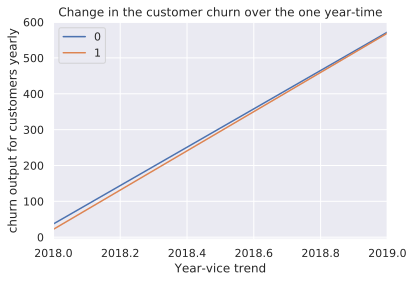

In [683]:
j.plot()
plt.xlabel('Year-vice trend')
plt.ylabel('churn output for customers yearly')
plt.title('Change in the customer churn over the one year-time')
plt.legend()
plt.show()

Very linear shape. I can't trust years. Reason is that there are only two values. So pattern of customers is not seen. Perhaps units are not defined very well

In [0]:
# Let's try with months
data_month=df['End_sub'].dt.month.sort_values()

In [0]:
k=df.groupby(data_month)['Churn.Status'].value_counts()

In [686]:
k[:5]

End_sub  Churn.Status
1        0                55
         1                38
2        0                67
         1                63
3        0               109
Name: Churn.Status, dtype: int64

In [0]:
k=k.unstack('Churn.Status')

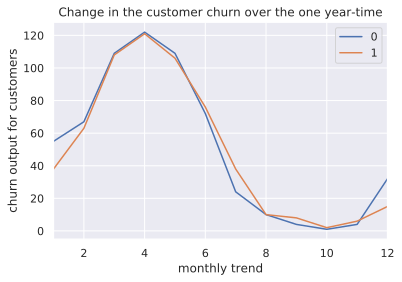

In [688]:
k.plot()
plt.xlabel('monthly trend')
plt.ylabel('churn output for customers')
plt.title('Change in the customer churn over the one year-time')
plt.legend()
plt.show()

In [0]:
# And then what about week

data_week=df['End_sub'].dt.week.sort_values()

In [690]:
data_week[:5]

497    1
258    1
370    1
90     1
33     1
Name: End_sub, dtype: int64

In [0]:
f=df.groupby(data_week)['Churn.Status'].value_counts()

In [692]:
f[:5]

End_sub  Churn.Status
1        0                9
         1                6
2        0               11
         1                6
3        1               10
Name: Churn.Status, dtype: int64

In [0]:
f=f.unstack('Churn.Status')

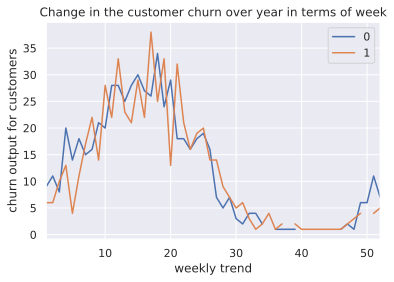

In [694]:
f.plot()
plt.xlabel('weekly trend')
plt.ylabel('churn output for customers')
plt.title('Change in the customer churn over year in terms of week')
plt.legend()
plt.show()

Both week and month plot went very high in middle i.e 16th week or 4th month. Then there is drop. I could be good if we have less churns. But, both values fall. I wonder why? 

In [0]:
# I will make month value as standard for this dataset and also for our pilot one. As we do not have much in years
df['EndSubscription']=df['End_sub'].dt.month

In [0]:
df.drop(['End_sub'], axis=1, inplace=True)

In [697]:
df.head(2)

,Customer.ID,Years.customer,Months.customer,Minutes.in.2018,Minutes.onnet,Minutes.offnet,Number.of.SMS,KBs.used,Total.Unique.Calls,Previous.provider,Churn.Status,Customer.Age,Customer.Municipality,Latitude,Longitude,Province,LoginsSite.Last.Month,LoginsSite.Last.6Months,EndSubscription,Total.Call.centre.complaint.calls,Name_of_package,MonthlySubscriptionPrice
0,ADF1259,3805,126.83,4091.616,1436.324929,2655.291071,81,3624.3750,117,KPN,0,44,Utrecht,52.090737,5.12142,Utrecht,6,11,5,2,MonthlySubscriptionPrice,45.640142
1,ADF1192,2905,96.83,3179.280,1949.967368,1229.312632,101,551842.8331,106,Telfort,0,31,Hoogeveen,52.728616,6.49010,Drenthe,8,12,4,2,MonthlySubscriptionPrice,21.871447


### 3.3)- Back to data

describe, sort, Indexing and retrieving data,Grouping, Summary table


#### a)describe

In [698]:
df.describe()

,Years.customer,Months.customer,Minutes.in.2018,Minutes.onnet,Minutes.offnet,Number.of.SMS,KBs.used,Total.Unique.Calls,Churn.Status,Customer.Age,Latitude,Longitude,LoginsSite.Last.Month,LoginsSite.Last.6Months,EndSubscription,Total.Call.centre.complaint.calls,MonthlySubscriptionPrice
count,1200.000000,1200.000000,1200.000000,1200.000000,1200.000000,1200.000000,1.200000e+03,1200.000000,1200.000000,1200.000000,1200.000000,1200.000000,1200.000000,1200.000000,1200.000000,1200.000000,1196.000000
mean,1449.879167,47.963500,4701.768722,2028.306172,2673.462550,29.699167,2.175305e+06,201.230000,0.492500,50.263333,52.074026,5.237919,5.783333,11.969167,4.454167,1.919167,25.398840
std,1277.940982,43.534543,7179.935753,3057.212614,5186.763577,60.427490,6.940443e+06,300.211014,0.500152,20.474659,0.485962,0.764339,1.938949,2.055903,2.401952,2.379570,16.576489
min,-5.000000,-221.000000,29.460000,0.078409,23.813500,0.000000,1.016000e-01,1.000000,0.000000,1.000000,50.773218,3.487605,1.000000,5.000000,1.000000,1.000000,-25.053562
25%,287.000000,9.392500,966.735000,330.172725,503.757469,3.000000,1.237192e+03,18.000000,0.000000,33.000000,51.813298,4.631314,4.000000,11.000000,3.000000,1.000000,14.421635
50%,1166.000000,38.730000,3530.894400,1333.372779,1553.224484,14.000000,1.321599e+05,77.500000,0.000000,49.000000,52.070498,5.121420,6.000000,12.000000,4.000000,1.000000,25.466279
75%,2245.750000,74.855000,5980.176000,2608.947728,3443.774867,31.000000,1.218452e+06,251.250000,1.000000,66.000000,52.367824,5.837226,7.000000,13.000000,6.000000,2.000000,36.632661
max,5451.000000,181.700000,146632.980000,41082.298830,127824.436900,874.000000,9.945640e+07,2596.000000,1.000000,100.000000,53.489374,6.977882,12.000000,18.000000,12.000000,49.000000,121.527382


In [699]:
df.describe(include=['object', 'bool'])

,Customer.ID,Previous.provider,Customer.Municipality,Province,Name_of_package
count,1200,1194,1200,1200,1200
unique,1200,7,306,12,1
top,ADF1414,TELE2,Rotterdam,Zuid-Holland,MonthlySubscriptionPrice
freq,1,286,58,287,1200


In [700]:
df['Churn.Status'].value_counts()

0    609
1    591
Name: Churn.Status, dtype: int64

**1 means the customer has churned, and 0 means no churn. There is not much difference so, we do not expect a biasness in class.609 users out of 1200 are loyal**

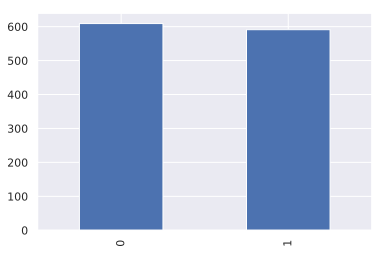

In [701]:
df['Churn.Status'].value_counts().plot(kind='bar')

In [702]:
df['Churn.Status'].value_counts(normalize=True)

0    0.5075
1    0.4925
Name: Churn.Status, dtype: float64

In [703]:
df['Churn.Status'].mean()

0.4925

**Horrible**

49.25% is actually really bad for a company; such a churn rate can make the company go bankrupt. Is there any problem with data or what? It can't be real for sure. I ll stop surprising and take it as an excercise now

### b)- Sorting

In [704]:
df.sort_values(by='Years.customer', ascending=False).head()

,Customer.ID,Years.customer,Months.customer,Minutes.in.2018,Minutes.onnet,Minutes.offnet,Number.of.SMS,KBs.used,Total.Unique.Calls,Previous.provider,Churn.Status,Customer.Age,Customer.Municipality,Latitude,Longitude,Province,LoginsSite.Last.Month,LoginsSite.Last.6Months,EndSubscription,Total.Call.centre.complaint.calls,Name_of_package,MonthlySubscriptionPrice
304,ADF1879,5451,181.70,1048.6200,686.902455,361.717545,29,7.215920e+01,23,Vodafone,0,40,Albrandswaard,51.858068,4.423187,Zuid-Holland,6,13,2,2,MonthlySubscriptionPrice,24.700151
185,ADF1413,5374,179.13,6051.4800,4466.731665,1584.748335,0,5.256497e+05,682,Vodafone,0,28,Soest,52.176352,5.299197,Utrecht,8,13,12,3,MonthlySubscriptionPrice,15.190089
221,ADF1368,5363,178.77,5536.3080,1875.355806,3660.952194,11,1.838702e+06,929,T-Mobile,0,35,Den Haag,52.070498,4.300700,Zuid-Holland,3,15,5,3,MonthlySubscriptionPrice,22.517582
724,ADF1503,5349,178.30,7281.3024,2437.007145,4844.295255,9,1.512027e+05,379,KPN,0,21,Leidschendam-Voorburg,52.087731,4.399386,Zuid-Holland,5,14,3,1,MonthlySubscriptionPrice,5.109186
378,ADF1324,5334,177.80,5252.4000,659.005735,4593.394265,0,5.263327e+04,1460,Telfort,0,22,Krimpenerwaard,51.982222,4.781667,Zuid-Holland,7,12,5,1,MonthlySubscriptionPrice,6.905020


In [705]:
df.sort_values(by=['Churn.Status', 'Years.customer'], ascending=[True, False]).head()

,Customer.ID,Years.customer,Months.customer,Minutes.in.2018,Minutes.onnet,Minutes.offnet,Number.of.SMS,KBs.used,Total.Unique.Calls,Previous.provider,Churn.Status,Customer.Age,Customer.Municipality,Latitude,Longitude,Province,LoginsSite.Last.Month,LoginsSite.Last.6Months,EndSubscription,Total.Call.centre.complaint.calls,Name_of_package,MonthlySubscriptionPrice
304,ADF1879,5451,181.70,1048.6200,686.902455,361.717545,29,7.215920e+01,23,Vodafone,0,40,Albrandswaard,51.858068,4.423187,Zuid-Holland,6,13,2,2,MonthlySubscriptionPrice,24.700151
185,ADF1413,5374,179.13,6051.4800,4466.731665,1584.748335,0,5.256497e+05,682,Vodafone,0,28,Soest,52.176352,5.299197,Utrecht,8,13,12,3,MonthlySubscriptionPrice,15.190089
221,ADF1368,5363,178.77,5536.3080,1875.355806,3660.952194,11,1.838702e+06,929,T-Mobile,0,35,Den Haag,52.070498,4.300700,Zuid-Holland,3,15,5,3,MonthlySubscriptionPrice,22.517582
724,ADF1503,5349,178.30,7281.3024,2437.007145,4844.295255,9,1.512027e+05,379,KPN,0,21,Leidschendam-Voorburg,52.087731,4.399386,Zuid-Holland,5,14,3,1,MonthlySubscriptionPrice,5.109186
378,ADF1324,5334,177.80,5252.4000,659.005735,4593.394265,0,5.263327e+04,1460,Telfort,0,22,Krimpenerwaard,51.982222,4.781667,Zuid-Holland,7,12,5,1,MonthlySubscriptionPrice,6.905020


### c)- Indexing and retrieving data

In [706]:
df['Churn.Status'].mean()

0.4925

We are more interested in knowing behavior of our loyal customers.So, let's focus there

In [707]:
#Boolean indexing
df[df['Churn.Status'] == 0].mean()

Years.customer                       1.606619e+03
Months.customer                      5.355392e+01
Minutes.in.2018                      5.016981e+03
Minutes.onnet                        2.449803e+03
Minutes.offnet                       2.567177e+03
Number.of.SMS                        2.460099e+01
KBs.used                             3.130041e+06
Total.Unique.Calls                   2.496141e+02
Churn.Status                         0.000000e+00
Customer.Age                         5.086535e+01
Latitude                             5.205266e+01
Longitude                            5.292958e+00
LoginsSite.Last.Month                5.446634e+00
LoginsSite.Last.6Months              1.200821e+01
EndSubscription                      4.438424e+00
Total.Call.centre.complaint.calls    2.091954e+00
MonthlySubscriptionPrice             3.096045e+01
dtype: float64

**How much time (on average) do loyal users spend on the on-network calls?**

In [708]:
df[df['Churn.Status'] == 0]['Minutes.onnet'].mean()

2449.8033358673424

In [709]:
df_telcom[df_telcom['Churn.Status'] == 0]['Minutes.offnet'].mean()

2567.1771882681287

What is the maximum length of time do churned users spend on the on-network & off-net calls

In [710]:
df_telcom[df_telcom['Churn.Status'] == 0]['Minutes.onnet'].max()

41082.29883

In [711]:
df_telcom[df_telcom['Churn.Status'] == 0]['Minutes.offnet'].max()

40304.75321

There is difference in max and mean value. Could we have problem with some anomoly.We ll come to this later when we discuss outliers

### d)- Grouping

In [0]:
columns_to_show = ['Minutes.in.2018', 
                   'Minutes.onnet', 
                   'Minutes.offnet']

In [713]:
df.groupby(['Churn.Status'])[columns_to_show].describe(percentiles=[])

Minutes.in.2018               ... Minutes.offnet              
                       count         mean  ...            50%           max
Churn.Status                               ...                             
0                      609.0  5016.980524  ...    1817.530783   40304.75321
1                      591.0  4376.956561  ...     770.893964  127824.43690

[2 rows x 18 columns]

In [714]:
df.groupby(['Customer.Age'])['Churn.Status'].size()

Customer.Age
1       1
2       2
18     23
19     20
20     15
21     21
22     21
23     15
24     27
25     19
26     16
27     17
28     18
29     24
30     14
31     14
32     16
33     23
34     17
35     24
36     29
37      9
38     17
39     14
40     19
41     12
42     26
43     17
44     21
45     18
       ..
71     14
72     16
73     14
74     11
75     10
76     11
77     11
78     12
79     15
80      8
81      3
82      8
83      6
84     13
85      9
86      6
87      4
88      8
89      3
90      3
91      8
92      2
93      5
94      5
95      4
96      3
97      2
98      4
99      2
100     1
Name: Churn.Status, Length: 85, dtype: int64

**Again, I am surprised why customers wit age 1 & 2 are listed there. Then There are some customers with age plus 90. Actually out of this small sample, there is rather large number of customer > 80.**

Not that am against senior citizens. Just wondering how come

### e)- Summary tables

Suppose we want to see how the observations in our dataset are distributed in the context of two variables - Churn and province. To do so, we can build a contingency table using the crosstab method

In [715]:
pd.crosstab(df['Churn.Status'], df['Province'],margins=True)

Province,Drenthe,Flevoland,Friesland,Gelderland,Groningen,Limburg,Noord-Brabant,Noord-Holland,Overijssel,Utrecht,Zeeland,Zuid-Holland,All
Churn.Status,,,,,,,,,,,,,
0,19,20,19,86,9,47,89,83,46,43,16,132,609
1,16,19,16,63,18,25,80,104,29,46,20,155,591
All,35,39,35,149,27,72,169,187,75,89,36,287,1200


In [716]:
pd.crosstab(df['Churn.Status'], df['Total.Call.centre.complaint.calls'],margins=True)

Total.Call.centre.complaint.calls,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,18,21,49,All
Churn.Status,,,,,,,,,,,,,,,,,,,,
0,335,144,49,30,14,13,7,3,2,1,5,2,2,1,0,1,0,0,0,609
1,431,89,30,14,6,6,2,2,1,3,1,1,1,0,1,0,1,1,1,591
All,766,233,79,44,20,19,9,5,3,4,6,3,3,1,1,1,1,1,1,1200


In [717]:
pd.crosstab(df['Churn.Status'], df['Previous.provider'], margins=True)

Previous.provider,0,Ben,KPN,T-Mobile,TELE2,Telfort,Vodafone,All
Churn.Status,,,,,,,,
0,23,91,142,82,117,70,80,605
1,11,80,132,50,169,49,98,589
All,34,171,274,132,286,119,178,1194


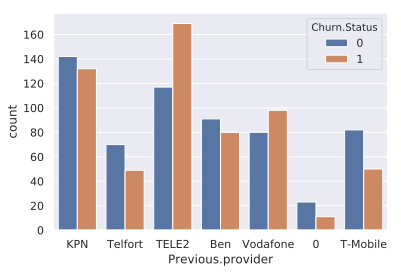

In [718]:
sns.countplot(x='Previous.provider', hue='Churn.Status', data=df_telcom);

# 4- Preprocessing Data

- Missing value check
- Encoding of categorical variables
- Removing extra features
- Transformation 
- Dimensionality Reduction


In [719]:
na_sum = list(df.isnull().sum())
print(len(na_sum))

22


In [720]:
na_col = list(df.isnull().sum().index)
print(len(na_col))

22


General role is that if a feature has more than 30%  of values are null, just drop the whole column.

### 4.1)- Checking missing values in columns and rows

In [721]:
drop_col =[]
for i in range(len(na_sum)):
    if na_sum[i] > 2523:
        drop_col.append(na_col[i])
print("We can drop ",len(drop_col)," Columns")

We can drop  0  Columns


We do not have any problem with columns statistically. However; I feel that some can be dropped. For example "Name_of_package" is what we added while merging financial dataset<br>

In [0]:
df.drop(['Name_of_package'], axis=1, inplace=True)

In [723]:
df.head(2)

,Customer.ID,Years.customer,Months.customer,Minutes.in.2018,Minutes.onnet,Minutes.offnet,Number.of.SMS,KBs.used,Total.Unique.Calls,Previous.provider,Churn.Status,Customer.Age,Customer.Municipality,Latitude,Longitude,Province,LoginsSite.Last.Month,LoginsSite.Last.6Months,EndSubscription,Total.Call.centre.complaint.calls,MonthlySubscriptionPrice
0,ADF1259,3805,126.83,4091.616,1436.324929,2655.291071,81,3624.3750,117,KPN,0,44,Utrecht,52.090737,5.12142,Utrecht,6,11,5,2,45.640142
1,ADF1192,2905,96.83,3179.280,1949.967368,1229.312632,101,551842.8331,106,Telfort,0,31,Hoogeveen,52.728616,6.49010,Drenthe,8,12,4,2,21.871447


In [0]:
# Checking rows now
def summary_missing(dataset):
    n_miss = dataset.isnull().sum()
    n_obs = dataset.shape[0]
    n_miss_per = n_miss/n_obs*100
    n_miss_tbl = pd.concat([n_miss, n_miss_per], axis = 1).sort_values(1, ascending = False).round(1)
    n_miss_tbl = n_miss_tbl[n_miss_tbl[1] != 0]
    print('No. of fields: ', dataset.shape[0])
    print('No. of missing fields: ', n_miss_tbl.shape[0])
    n_miss_tbl = n_miss_tbl.rename(columns = {0:'No. of mising Value', 1:'%age of missing Value'})
    return n_miss_tbl

In [725]:
summary_missing(df)

No. of fields:  1200
No. of missing fields:  2


,No. of mising Value,%age of missing Value
Previous.provider,6,0.5
MonthlySubscriptionPrice,4,0.3


In [0]:
# imput null with mean values
df = df.fillna(df.mean())

In [727]:
summary_missing(df)

No. of fields:  1200
No. of missing fields:  1


,No. of mising Value,%age of missing Value
Previous.provider,6,0.5


**We will deal with "Previous.provider" feature very soon in encoding section**

### 4.2)- Duplicate values

Above all , customers are the most critical variable to check

In [0]:
cust=df['Customer.ID']

In [729]:
#patent.appln_abstr.duplicated()
cust.duplicated()

0       False
1       False
2       False
3       False
4       False
5       False
6       False
7       False
8       False
9       False
10      False
11      False
12      False
13      False
14      False
15      False
16      False
17      False
18      False
19      False
20      False
21      False
22      False
23      False
24      False
25      False
26      False
27      False
28      False
29      False
        ...  
1170    False
1171    False
1172    False
1173    False
1174    False
1175    False
1176    False
1177    False
1178    False
1179    False
1180    False
1181    False
1182    False
1183    False
1184    False
1185    False
1186    False
1187    False
1188    False
1189    False
1190    False
1191    False
1192    False
1193    False
1194    False
1195    False
1196    False
1197    False
1198    False
1199    False
Name: Customer.ID, Length: 1200, dtype: bool

In [730]:
cust.duplicated().sum()

0

Again we are lucky to have no duplicate value issue

In [0]:
# For saving our cleaned data
#df_clean=df

In [732]:
df.shape

(1200, 21)

In [0]:
import pickle
df.to_pickle('file_clean.pkl')

### 4.3)-Outlier Detection 

**Tukey IQR**<br>
Identifies extreme values in data
Outliers are defined as:<br>
Values below Q1-1.5(Q3-Q1) or above Q3+1.5(Q3-Q1)<br>
Standard deviation from the mean is another common method to detect extreme values
But it can be problematic:<br>
- Assumes normality
- Sensitive to very extreme values


In [0]:
def find_outliers_tukey(x):
    q1 = np.percentile(x, 25)
    q3 = np.percentile(x, 75)
    iqr = q3-q1 
    floor = q1 - 1.5*iqr
    ceiling = q3 + 1.5*iqr
    outlier_indices = list(x.index[(x < floor)|(x > ceiling)])
    outlier_values = list(x[outlier_indices])

    return outlier_indices, outlier_values

In [735]:
df.head(2)

,Customer.ID,Years.customer,Months.customer,Minutes.in.2018,Minutes.onnet,Minutes.offnet,Number.of.SMS,KBs.used,Total.Unique.Calls,Previous.provider,Churn.Status,Customer.Age,Customer.Municipality,Latitude,Longitude,Province,LoginsSite.Last.Month,LoginsSite.Last.6Months,EndSubscription,Total.Call.centre.complaint.calls,MonthlySubscriptionPrice
0,ADF1259,3805,126.83,4091.616,1436.324929,2655.291071,81,3624.3750,117,KPN,0,44,Utrecht,52.090737,5.12142,Utrecht,6,11,5,2,45.640142
1,ADF1192,2905,96.83,3179.280,1949.967368,1229.312632,101,551842.8331,106,Telfort,0,31,Hoogeveen,52.728616,6.49010,Drenthe,8,12,4,2,21.871447


In [0]:
df_outlier=df['Years.customer']

In [737]:
tukey_indices, tukey_values = find_outliers_tukey(df_outlier)
print(np.sort(tukey_values))

[5334 5349 5363 5374 5451]


In [738]:
df['Years.customer'].mean()

1449.8791666666666

In [739]:
tukey_indices, tukey_values = find_outliers_tukey(df['Minutes.in.2018'])
print(np.sort(tukey_values))


[ 13724.52    13995.78    14134.62    14508.72    14930.628   15001.5984
  15149.544   15407.7     16341.24    16570.8     16998.72    17046.96
  17392.944   17641.08    18744.4296  18784.188   19020.84    20038.272
  20675.7     21379.74    21504.9     21647.052   21649.32    21666.96
  21953.64    22088.64    22144.98    22480.908   22669.8     22754.1
  22881.06    23085.      23328.9912  23450.76    23467.8     23986.308
  24012.4248  25479.36    26687.16    26903.34    27853.98    28041.372
  28319.28    31326.9     32561.34    32967.792   34000.9248  35876.472
  35958.      40130.88    40193.8056  40615.3344  42377.244   44799.2208
  45580.272   59815.26    60992.652  146632.98  ]


In [740]:
df['Minutes.in.2018'].mean()

4701.768722099999

In [741]:
tukey_indices, tukey_values = find_outliers_tukey(df['LoginsSite.Last.Month'])
print(np.sort(tukey_values))

[12 12 12]


In [742]:
df['LoginsSite.Last.Month'].mean()

5.783333333333333

**We need to solve this problem through scaling**

### 4.4)- Encoding categorical features

In [743]:
df.head(2)

,Customer.ID,Years.customer,Months.customer,Minutes.in.2018,Minutes.onnet,Minutes.offnet,Number.of.SMS,KBs.used,Total.Unique.Calls,Previous.provider,Churn.Status,Customer.Age,Customer.Municipality,Latitude,Longitude,Province,LoginsSite.Last.Month,LoginsSite.Last.6Months,EndSubscription,Total.Call.centre.complaint.calls,MonthlySubscriptionPrice
0,ADF1259,3805,126.83,4091.616,1436.324929,2655.291071,81,3624.3750,117,KPN,0,44,Utrecht,52.090737,5.12142,Utrecht,6,11,5,2,45.640142
1,ADF1192,2905,96.83,3179.280,1949.967368,1229.312632,101,551842.8331,106,Telfort,0,31,Hoogeveen,52.728616,6.49010,Drenthe,8,12,4,2,21.871447


In [744]:
df.shape

(1200, 21)

This shape is gonna increase here 

In [745]:
pd.get_dummies(df['Province']).iloc[:,1:].head()

,Flevoland,Friesland,Gelderland,Groningen,Limburg,Noord-Brabant,Noord-Holland,Overijssel,Utrecht,Zeeland,Zuid-Holland
0,0,0,0,0,0,0,0,0,1,0,0
1,0,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,1,0,0,0,0,0
3,0,0,0,0,0,0,1,0,0,0,0
4,0,0,0,0,0,1,0,0,0,0,0


In [0]:
province_dummy=pd.get_dummies(df['Province'],prefix='Province').iloc[:,1:]

In [0]:
df=pd.concat([df,province_dummy],axis=1)

In [748]:
df.head(2)

,Customer.ID,Years.customer,Months.customer,Minutes.in.2018,Minutes.onnet,Minutes.offnet,Number.of.SMS,KBs.used,Total.Unique.Calls,Previous.provider,Churn.Status,Customer.Age,Customer.Municipality,Latitude,Longitude,Province,LoginsSite.Last.Month,LoginsSite.Last.6Months,EndSubscription,Total.Call.centre.complaint.calls,MonthlySubscriptionPrice,Province_Flevoland,Province_Friesland,Province_Gelderland,Province_Groningen,Province_Limburg,Province_Noord-Brabant,Province_Noord-Holland,Province_Overijssel,Province_Utrecht,Province_Zeeland,Province_Zuid-Holland
0,ADF1259,3805,126.83,4091.616,1436.324929,2655.291071,81,3624.3750,117,KPN,0,44,Utrecht,52.090737,5.12142,Utrecht,6,11,5,2,45.640142,0,0,0,0,0,0,0,0,1,0,0
1,ADF1192,2905,96.83,3179.280,1949.967368,1229.312632,101,551842.8331,106,Telfort,0,31,Hoogeveen,52.728616,6.49010,Drenthe,8,12,4,2,21.871447,0,0,0,0,0,0,0,0,0,0,0


In [749]:
df.shape

(1200, 32)

In [750]:
df.Province[:5]

0          Utrecht
1          Drenthe
2    Noord-Brabant
3    Noord-Holland
4    Noord-Brabant
Name: Province, dtype: object

Need to drop existing one as it has been encoded.

In [0]:
df.drop(['Province'], axis=1, inplace=True)

In [752]:
df.shape

(1200, 31)

**let's move to Customer.Municipality**

In [753]:
len(df['Customer.Municipality'].value_counts())

306

**It is a big number. We cannot ignore though. It is much more focussed and can be a valuable feature for our analysis**

In [0]:
municipality_dummy=pd.get_dummies(df['Customer.Municipality'],prefix='Customer.Municipality').iloc[:,1:]

In [0]:
df=pd.concat([df,municipality_dummy],axis=1)

In [756]:
df.shape

(1200, 336)

In [757]:
len(df['Customer.Municipality'].value_counts())

306

In [0]:
df.drop(['Customer.Municipality'], axis=1, inplace=True)

In [759]:
df.shape

(1200, 335)

**Finally, we have Previous.provider**

In [760]:
len(df['Previous.provider'].value_counts())

7

In [0]:
provider_dummy=pd.get_dummies(df['Previous.provider'],prefix='Previous.provider').iloc[:,1:]

In [0]:
df=pd.concat([df,provider_dummy],axis=1)

In [763]:
df.shape

(1200, 341)

In [0]:
df.drop(['Previous.provider'], axis=1, inplace=True)

In [765]:
df.shape

(1200, 340)

### 4.5)- Round2: Missing values removal

If we remember, we also have to fillin values for this features. So, let's fill value "most frequent". <br>

We can also drop customer_ID values.These values are not much of interest for our model.

In [0]:
df.drop(['Customer.ID'], axis=1, inplace=True)

In [767]:
df.shape

(1200, 339)

In [768]:
from sklearn.preprocessing import Imputer
imp = Imputer(missing_values='NaN', strategy='most_frequent', axis=0)
imp.fit(df)

Imputer(axis=0, copy=True, missing_values='NaN', strategy='most_frequent',
        verbose=0)

In [769]:
summary_missing(df)

No. of fields:  1200
No. of missing fields:  0


,No. of mising Value,%age of missing Value


### 4.6)- Separate features

In [0]:
# For future use in section 6
df_tunning=df.copy()

In [771]:
df_tunning.shape

(1200, 339)

In [772]:
df_tunning['Churn.Status'][:5]

0    0
1    0
2    0
3    1
4    0
Name: Churn.Status, dtype: int64

In [0]:
import pickle
df_tunning.to_pickle('file_model_tune.pkl')

In [0]:
df_labels=df['Churn.Status']

In [775]:
df_labels[:5]

0    0
1    0
2    0
3    1
4    0
Name: Churn.Status, dtype: int64

In [0]:
df_model = df.drop(['Churn.Status'], axis=1)

### 4.7)Transformation

Normalize data

In [0]:
from sklearn.preprocessing import StandardScaler
X = StandardScaler().fit_transform(df_model) # Since we have separated our label i.e churn feature.So, all other values are in X

In [778]:
X.shape

(1200, 338)

### 4.8)-Dimension Reduction

PCA methods being used <br>
Find out what is fairly good value for n_components according to the Explained Variance Ratio <br>
Reduce dimensions by the n_components <br>

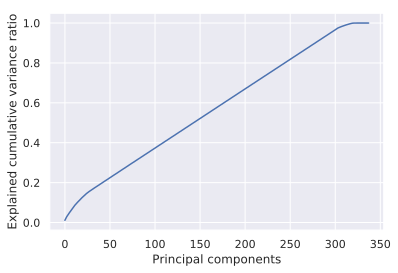

In [779]:
#PCA In Sklearn
from sklearn.decomposition import PCA

pca_full = PCA(n_components = None)
pca_full.fit(X)

plt.plot(range(0,338), pca_full.explained_variance_ratio_.cumsum())
plt.ylabel('Explained cumulative variance ratio')
plt.xlabel('Principal components')
#plt.xticks(np.arange(0,100,5))
plt.show()

In [780]:
x_scaled = StandardScaler().fit_transform(X)
pca = PCA(n_components = 300)
x_pca = pca.fit_transform(x_scaled)
print(x_pca, end = '\n\n')

[[ 6.11084080e-01  1.45527290e-01 -1.64330381e-01 ...  3.04157676e-14
   9.49783536e-14  5.62099917e-14]
 [ 1.10396090e+00 -1.66400104e+00 -2.33544079e-01 ...  9.68834252e-13
  -5.83202147e-13 -1.82303544e-12]
 [ 5.31023803e-02  1.46779741e+00  1.53692822e+00 ...  4.87554046e-13
  -2.53628801e-13 -2.30430907e-13]
 ...
 [-5.15904400e-01  1.95120076e+00 -1.40299907e+00 ...  7.61178537e-14
  -1.88863318e-14 -1.11217631e-15]
 [-1.53448400e+00  1.48270853e+00 -1.21932523e+00 ...  5.04386984e-14
  -6.21466085e-15  1.35039245e-14]
 [ 1.11161304e+00 -1.58019602e+00  8.72347333e-03 ...  3.46504136e+00
  -2.54301612e+00 -1.46085056e+00]]



In [781]:
print(pca.explained_variance_ratio_)

[0.01130607 0.00927562 0.00838601 0.00698197 0.00675174 0.00646151
 0.00635645 0.00627012 0.00620201 0.00616349 0.00612704 0.00609641
 0.00517738 0.00499569 0.00486767 0.00476594 0.00475475 0.00467376
 0.00456954 0.00454296 0.00424108 0.00422961 0.00415123 0.0040946
 0.00405885 0.00360026 0.00340066 0.00326302 0.00316776 0.00308006
 0.0030545  0.00303662 0.00300501 0.00299891 0.00299563 0.00299459
 0.00298896 0.00298775 0.00298665 0.00298594 0.00298504 0.0029848
 0.00298369 0.00298319 0.00298269 0.00298241 0.00298213 0.00298092
 0.00298065 0.00297974 0.00297962 0.00297907 0.00297883 0.00297791
 0.00297779 0.00297757 0.00297685 0.00297677 0.00297658 0.00297634
 0.00297622 0.00297555 0.00297525 0.00297508 0.00297473 0.00297466
 0.00297357 0.00297323 0.0029731  0.00297298 0.00297288 0.00297283
 0.00297263 0.00297242 0.00297235 0.00297215 0.00297194 0.00297175
 0.00297155 0.00297149 0.00297094 0.00297092 0.00297091 0.00297086
 0.00297085 0.00297075 0.00297062 0.00297056 0.00297046 0.002970

In [782]:
sum(pca.explained_variance_ratio_)

0.9632776971751968

This shows that our 300 dimensions cover enough of features' effect as we need. There is no rule of how much lower one should go. It is better to get as much of feature effect as we could

In [783]:
x_pca.shape

(1200, 300)

# 5)- Model Training

### 5.1)-Train and Test split

In [0]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(x_pca, df_labels, test_size=0.1660, random_state=0)

In [785]:
print(X_train.shape)
print(X_test.shape)

(1000, 300)
(200, 300)


In [786]:
print(y_train.shape)
print(y_test.shape)

(1000,)
(200,)


In [787]:
X_train

array([[ 6.78266893e-01, -1.67384536e-01, -1.81565109e+00, ...,
         3.71066728e-14,  3.13969062e-14,  5.58417712e-14],
       [-1.35062309e+00,  5.68098204e-01,  1.90038812e+00, ...,
         2.08983940e-13, -4.01285235e-14,  2.07766558e-13],
       [ 1.70079278e+00,  3.20613602e+00, -8.72798031e-01, ...,
         6.64825931e-13,  7.98873235e-13,  7.54580861e-13],
       ...,
       [ 2.91790953e-01, -1.71513044e+00,  1.22318265e+00, ...,
        -2.87850766e-14,  3.22649251e-13, -1.22342212e-13],
       [ 8.51949199e-01,  1.57186164e+00,  1.33243355e+00, ...,
         2.50659741e-12, -9.51538971e-12, -5.29147937e-12],
       [ 7.91470287e-01,  3.45354982e-01,  1.81843974e-01, ...,
         5.20497008e-12,  1.16483278e-11, -3.14866130e-14]])

### Model Building

In [0]:
models = []
models.append(("LR",LogisticRegression()))
models.append(("NB",GaussianNB()))
models.append(("KNN",KNeighborsClassifier()))
models.append(("DT",DecisionTreeClassifier()))
models.append(("RF",RandomForestClassifier()))
models.append(("SVM",SVC()))

In [789]:
results = []
names = []
for name,model in models:
    kfold = KFold(n_splits=10, random_state=22)
    cv_result = cross_val_score(model,X_train,y_train, cv = kfold,scoring = "accuracy")
    names.append(name)
    results.append(cv_result)
for i in range(len(names)):
    print(names[i],results[i].mean())

LR 0.6079999999999999
NB 0.5149999999999999
KNN 0.5450000000000002
DT 0.579
RF 0.5449999999999999
SVM 0.568


In [790]:
results = []
names = []
for name,model in models:
    kfold = KFold(n_splits=10, random_state=22)
    cv_result = cross_val_score(model,X_train,y_train, cv = kfold,scoring = "recall")
    names.append(name)
    results.append(cv_result)
for i in range(len(names)):
    print(names[i],results[i].mean())

LR 0.6163887875613299
NB 0.6947501958209505
KNN 0.6440148013467278
DT 0.57121629046778
RF 0.46977692568382734
SVM 0.559350314338646


[Text(0, 0, 'LR'),
 Text(0, 0, 'NB'),
 Text(0, 0, 'KNN'),
 Text(0, 0, 'DT'),
 Text(0, 0, 'RF'),
 Text(0, 0, 'SVM')]

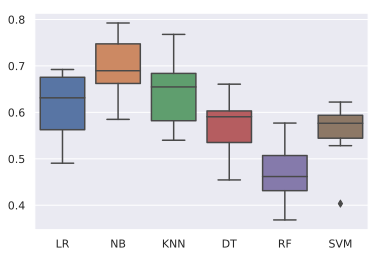

In [791]:
ax = sns.boxplot(data=results)
figsize=(16, 7)
ax.set_xticklabels(names)

### Prediction 

In [0]:
# Logistic Classifeir
logreg = LogisticRegression(C=1e5)
logreg.fit(X_train, y_train)
predictions_LR = logreg.predict(X_test)

In [793]:
predictions_LR[:5]

array([1, 1, 0, 1, 0])

In [794]:
print(accuracy_score(y_test,predictions_LR))

0.56


In [795]:
print(recall_score(y_test,predictions_LR))

0.6153846153846154


In [0]:
# Naive BAyes
nb = GaussianNB()
nb.fit(X_train,y_train)
predictions_nb = nb.predict(X_test)

In [797]:
print(predictions_nb[:5])

[1 1 1 1 0]


In [798]:
predictions_nb.shape

(200,)

In [799]:
print(accuracy_score(y_test,predictions_nb))

0.495


In [800]:
print(recall_score(y_test,predictions_nb))

0.7802197802197802


In [0]:
# KNN
knn = KNeighborsClassifier(n_neighbors=5, metric='minkowski', p=2)
# For minkowski, we need to pick parameter. 1 was for manhaten distance and p=2 for Euclidean distance.
knn.fit(X_train,y_train)
predictions_knn = knn.predict(X_test)

In [802]:
print(predictions_knn[:5])

[1 1 0 1 1]


In [803]:
print(accuracy_score(y_test,predictions_knn))

0.49


In [804]:
print(recall_score(y_test,predictions_knn))

0.5714285714285714


In [805]:
dt = DecisionTreeClassifier(criterion='entropy', random_state=0)
dt.fit(X_train, y_train)
pred_dt = dt.predict(X_test)
pred_dt[:5]

array([1, 1, 0, 1, 1])

In [806]:
recall_score(y_test,pred_dt)

0.6153846153846154

In [0]:
dt_score=recall_score(y_test,pred_dt)

So, Naive Bayes predicts the best results of recall.It may be the best option for accuracy though.

### confusion Matrix

A confusion matrix is a table that is often used to describe the performance of a classification model (or "classifier") on a set of test data for which the true values are known. 
Key matrix elements are:
true positives (TP): These are cases in which we predicted yes (customers churned), and actually they do have churned i.e left.
true negatives (TN): We predicted loyal customers,actually they were.
false positives (FP): We predicted churned customers, but actually they were loyal ones. (Also known as a "Type I error.")
false negatives (FN): We predicted non-churned customers, but they actually have left i.e churned. (Also known as a "Type II error.")

In [0]:
import itertools
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Spectral):
    """
    See full source and example: 
    http://scikit-learn.org/stable/auto_examples/model_selection/plot_confusion_matrix.html
    
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="black" if cm[i, j] > thresh else "white")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

In [809]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, predictions_nb)
cm

array([[28, 81],
       [20, 71]])

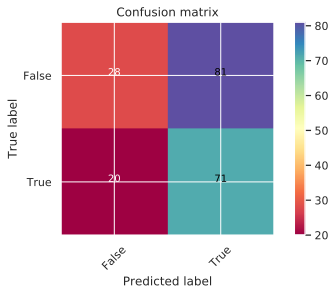

In [810]:
# False=0; True=1
plot_confusion_matrix(cm, classes=['False', 'True'])

We have 56 values where our model predicted loyal customers and they turned out to be staying customers .So good job!
We have 35 values where our model predicted non-leaving customers and they were actually churned ones. That's really uncool.
We have 53 values where our model predicted churned customers. Actually those poor guys were loyal customers. Sorry ! 
We have only 56 values where we predicted leaving customers and they actually were leaving. 
Note
We can imagine that our model does not look very accurate. Still we only made 56 right predictions regarding churned customers successfully.Also, we have made same 56 right predictions about loyals ones
We left out 35 churned ones. In real world if data was huge, that won't not really bad. But, we have a smaller dataset. 35 means 17.5% false positives.That's where accuracy matrics fails. 
Another issue with accuracy is that our model got very ideal situation where class of churned and loyal customer is almost same.Hence, we got pretty much same number i.e 56 for True positive and True negatives.
If we tend to focus(as mentioned in excercise) more on our loyal customers than our churned ones then we need to check True positive and False negative results seriously.
Note that we are falsely predicting 53 loyal customers i.e 26.5% . An alarming %age even though our data is small yet we cannot be that wrong on our focussed segment 
Those who are actually loyal to us is our concern and our prediction should get better results there.
That's why we can conclude that accuracy in this problem is not the best identifier of good model

In [811]:
from sklearn.metrics import classification_report
print(classification_report(y_test, predictions_nb))

              precision    recall  f1-score   support

           0       0.58      0.26      0.36       109
           1       0.47      0.78      0.58        91

    accuracy                           0.49       200
   macro avg       0.53      0.52      0.47       200
weighted avg       0.53      0.49      0.46       200



In [812]:
from sklearn.metrics import classification_report
print(classification_report(y_test, predictions_LR))

              precision    recall  f1-score   support

           0       0.62      0.51      0.56       109
           1       0.51      0.62      0.56        91

    accuracy                           0.56       200
   macro avg       0.56      0.56      0.56       200
weighted avg       0.57      0.56      0.56       200



### predict_proba


In [813]:
logreg.predict_proba(X_test)[0:10, :]

array([[0.09273525, 0.90726475],
       [0.37284298, 0.62715702],
       [0.88021459, 0.11978541],
       [0.22781861, 0.77218139],
       [0.7090301 , 0.2909699 ],
       [0.04067906, 0.95932094],
       [0.72020614, 0.27979386],
       [0.89055245, 0.10944755],
       [0.10824164, 0.89175836],
       [0.12565465, 0.87434535]])

Left column shows for class 0(loyal) and right for class 1(churned)

In [814]:
# Logistic probability prediction for only class 0 i.e Loyal customer as per excercise requirement
pred_prob_cl0 = logreg.predict_proba(X_test)[:, 0]
print(pred_prob_cl0[:5])

[0.09273525 0.37284298 0.88021459 0.22781861 0.7090301 ]


In [815]:
pred_prob_cl1 = logreg.predict_proba(X_test)[:, 1]
print(pred_prob_cl0[:5])

[0.09273525 0.37284298 0.88021459 0.22781861 0.7090301 ]


Text(0, 0.5, 'Frequency')

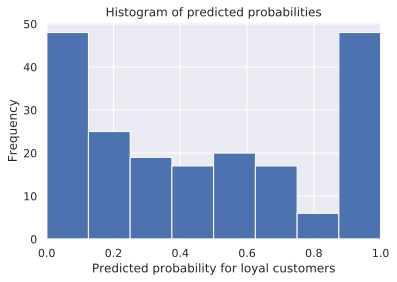

In [816]:
# histogram of predicted probabilities
plt.hist(pred_prob_cl0, bins=8)
plt.xlim(0, 1)
plt.title('Histogram of predicted probabilities')
plt.xlabel('Predicted probability for loyal customers')
plt.ylabel('Frequency')

Text(0, 0.5, 'Frequency')

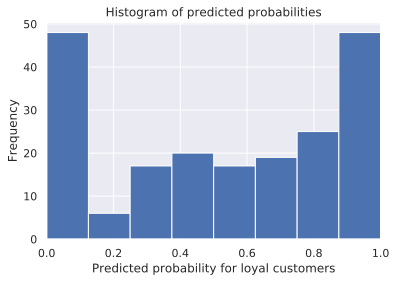

In [817]:
# histogram of predicted probabilities for churned customers
plt.hist(pred_prob_cl1, bins=8)
plt.xlim(0, 1)
plt.title('Histogram of predicted probabilities')
plt.xlabel('Predicted probability for loyal customers')
plt.ylabel('Frequency')

### ROC curve

In [0]:
from sklearn.metrics import roc_curve
roc_score=roc_curve(y_test, pred_prob_cl1)


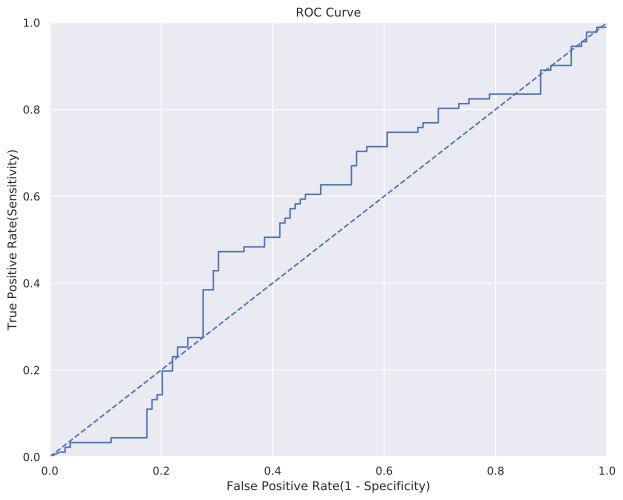

In [819]:
# Representing roc_curve
from sklearn.metrics import roc_curve
fpr, tpr, thres = roc_curve(y_test, pred_prob_cl1)


def _plot_roc_curve(fpr, tpr, thres):
    roc = plt.figure(figsize = (10, 8))
    plt.plot(fpr, tpr, 'b-', label = 'ROC')
    plt.plot([0, 1], [0, 1], '--')
    plt.axis([0, 1, 0, 1])
    plt.xlabel('False Positive Rate(1 - Specificity)')
    plt.ylabel('True Positive Rate(Sensitivity)')
    plt.title('ROC Curve')
    return roc
p1 = _plot_roc_curve(fpr, tpr, thres)

### AUC


In [820]:
from sklearn.metrics import auc
auc(fpr, tpr)

0.5459219679403167

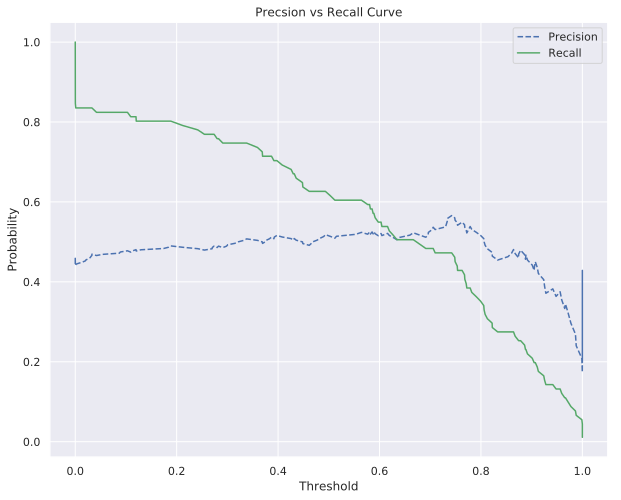

In [821]:
from sklearn.metrics import roc_curve, precision_recall_curve
prec, rec, thres = precision_recall_curve(y_test, pred_prob_cl1)

def _plot_prec_rec_curve(prec, rec, thres):
    plot_pr = plt.figure(figsize = (10, 8))
    plt.plot(thres, prec[:-1], 'b--', label = 'Precision')
    plt.plot(thres, rec[:-1], 'g-', label = 'Recall')
    plt.xlabel('Threshold')
    plt.ylabel('Probability')
    plt.title('Precsion vs Recall Curve')
    plt.legend()
    #return plot_pr(it creates duplicate graph)

_plot_prec_rec_curve(prec, rec, thres)

# 7)-Features' adjustment

Like End Game-Avengers, we need to go back in right time slots of our working notebook and fix some things.

In [0]:
df = pd.read_pickle('file_clean.pkl')

In [823]:
df.shape

(1200, 21)

In [824]:
df.head(2)

,Customer.ID,Years.customer,Months.customer,Minutes.in.2018,Minutes.onnet,Minutes.offnet,Number.of.SMS,KBs.used,Total.Unique.Calls,Previous.provider,Churn.Status,Customer.Age,Customer.Municipality,Latitude,Longitude,Province,LoginsSite.Last.Month,LoginsSite.Last.6Months,EndSubscription,Total.Call.centre.complaint.calls,MonthlySubscriptionPrice
0,ADF1259,3805,126.83,4091.616,1436.324929,2655.291071,81,3624.3750,117,KPN,0,44,Utrecht,52.090737,5.12142,Utrecht,6,11,5,2,45.640142
1,ADF1192,2905,96.83,3179.280,1949.967368,1229.312632,101,551842.8331,106,Telfort,0,31,Hoogeveen,52.728616,6.49010,Drenthe,8,12,4,2,21.871447


We will drop some features. As either they are giving us information that we already know.
i)- drop Minutes.onnet and Minutes.offnet. They are adding up in Minutes.in.2018 and hence are not doing much favor to our analysis
ii)- We will keep Months.customer. As years.customers is giving same information about time passed since the subscriber started using the services. They both reflect time and one can compliment other.
iii)-customer.ID will not do anything in analysis as it is ID . Let's drop that too.
iv)-Customer.Municipality and Province are also giving same information about location. Only one needed.
v)- Longitude and Latitude are all about location. We can get that information from Province or Customer.Municipality. Let's drop them both.
vi)-LoginsSite.Last.Month and LoginsSite.Last.6Months are also same. So, we will keep one out of them.
vii)- Finally, Previous.provider has not been much help both in terms of analysis and domain. We know that if we want to keep our customers loyal then keeping track of their previous service provider would not help much. If we want to keep track of our churn then it would be much better to collect data where our customers are shifting to. i.e what new service provider they have selected over us would be more effective. Hence, drop it goes

In [0]:
df_feat = df.drop(['Customer.ID','Years.customer','Minutes.onnet','Minutes.offnet','Customer.Municipality','Latitude','Longitude','LoginsSite.Last.Month','Previous.provider'], axis=1)

In [826]:
df_feat.shape

(1200, 12)

In [0]:
#df_feat.to_pickle('file_feature.pkl')

In [0]:
#df_feat.to_csv('clean_feature.csv', index=False)

**Quick check to missing values**

In [829]:
#calling already made function
summary_missing(df_feat)

No. of fields:  1200
No. of missing fields:  0


,No. of mising Value,%age of missing Value


**Quick encoding**

In [0]:
province_dummy=pd.get_dummies(df_feat['Province'],prefix='Province').iloc[:,1:]
df_feat=pd.concat([df_feat,province_dummy],axis=1)

In [0]:
df_feat.drop(['Province'], axis=1, inplace=True)

In [832]:
df_feat.shape

(1200, 22)

**Separate features for model**

In [0]:
# For future use
df_tunning=df_feat.copy()

In [834]:
df_tunning.shape

(1200, 22)

In [0]:
df_tunning.to_pickle('file_model_tune_feature.pkl')

In [0]:
y=df_feat['Churn.Status']

In [0]:
df_model = df_feat.drop(['Churn.Status'], axis=1)

In [0]:
X = StandardScaler().fit_transform(df_model)

In [839]:
X[:2]

array([[ 1.81233973, -0.08501568,  0.84931911, -0.31303268, -0.2806863 ,
        -0.30603414, -0.47160329,  0.22734047,  0.03398389,  1.22363692,
        -0.18328047, -0.17332893, -0.37652323, -0.15171652, -0.25264558,
        -0.40486853, -0.42965125, -0.25819889,  3.5331496 , -0.17586311,
        -0.56066773],
       [ 1.12294446, -0.21213609,  1.18043229, -0.23401078, -0.31734247,
        -0.94123007,  0.01500372, -0.18916115,  0.03398389, -0.21323965,
        -0.18328047, -0.17332893, -0.37652323, -0.15171652, -0.25264558,
        -0.40486853, -0.42965125, -0.25819889, -0.28303359, -0.17586311,
        -0.56066773]])

In [840]:
X.shape

(1200, 21)

**Train-test split**

In [0]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1660, random_state=0)

In [842]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(1000, 21)
(200, 21)
(1000,)
(200,)


# 8)- Back to Modeling

Fingers crossed !!!

In [0]:
models = []
models.append(("LR",LogisticRegression()))
models.append(("NB",GaussianNB()))
models.append(("KNN",KNeighborsClassifier()))
models.append(("DT",DecisionTreeClassifier()))
models.append(("RF",RandomForestClassifier()))
models.append(("SVM",SVC()))

In [844]:
results = []
names = []
for name,model in models:
    kfold = KFold(n_splits=10, random_state=22)
    cv_result = cross_val_score(model,X_train,y_train, cv = kfold,scoring = "accuracy")
    names.append(name)
    results.append(cv_result)
for i in range(len(names)):
    print(names[i],results[i].mean())

LR 0.681
NB 0.613
KNN 0.615
DT 0.792
RF 0.781
SVM 0.6869999999999999


In [845]:
results = []
names = []
for name,model in models:
    kfold = KFold(n_splits=10, random_state=22)
    cv_result = cross_val_score(model,X_train,y_train, cv = kfold,scoring = "recall")
    names.append(name)
    results.append(cv_result)
for i in range(len(names)):
    print(names[i],results[i].mean())

LR 0.6930659981638134
NB 0.6944443265274944
KNN 0.6668332124953276
DT 0.8117577660671008
RF 0.74672823797079
SVM 0.7127146679316491


### 8.1-Logistic Classification

In [846]:
# Logistic Classifeir
lg = LogisticRegression(C=1e5)
lg.fit(X_train, y_train)
predictions_lg = lg.predict(X_test)
predictions_lg[:5]

array([1, 0, 0, 1, 1])

In [847]:
print(accuracy_score(y_test, predictions_lg))

0.605


In [848]:
print(recall_score(y_test, predictions_lg))

0.6923076923076923


In [0]:
lg_score=recall_score(y_test, predictions_lg)

In [850]:
from sklearn.metrics import classification_report
print(classification_report(y_test, predictions_lg))

              precision    recall  f1-score   support

           0       0.67      0.53      0.59       109
           1       0.55      0.69      0.61        91

    accuracy                           0.60       200
   macro avg       0.61      0.61      0.60       200
weighted avg       0.62      0.60      0.60       200



Logistic classification is our go to model. Let's explore it a little after feature modification and see how it has effected it

**GridSearchCV using Logistic Model**

In [851]:
def get_bootstrap_samples(df_feat, n_samples):
    """Generate samples using bootstrapping."""
    indices = np.random.randint(0, len(df_feat), (n_samples, len(df_feat)))
    samples = df_feat[indices]
    return samples

def stat_intervals(stat, alpha):
    """Make an interval estimate."""
    boundaries = np.percentile(stat, [100 * alpha / 2., 100 * (1 - alpha / 2.)])
    return boundaries

# Save the complaint tend of those who churned
churn = df[df['Churn.Status'] == 1]['Total.Call.centre.complaint.calls'].values

# Set the random seed for reproducibility 
np.random.seed(0)

# Generate bootstrap samples and calculate the mean for each sample
churn_mean_scores = [np.mean(sample) for sample in get_bootstrap_samples(churn, 1000)]

# Print the interval estimate for the sample means
print("Mean interval", stat_intervals(churn_mean_scores, 0.1))

Mean interval [1.5785956  1.94086294]


In [0]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV, StratifiedKFold

we will create a LogisticRegression model and use class_weight='balanced' as we do not have much difference in our churn variable

In [0]:
lr = LogisticRegression(random_state=5, class_weight='balanced')

Let's try to find the best regularization coefficient, which is the coefficient C for logistic regression. Then, we will have an optimal model that is not overfit and is a good predictor of the target variable.

In [0]:
parameters = {'C': (0.0001, 0.001, 0.01, 0.1, 1, 10)}

In order to find the optimal value of C, let's apply stratified 5-fold validation and look at the "Recall" score against different values of the parameter C. Use the StratifiedKFold function for this:

In [0]:
skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=5)

One of the important metrics of model quality is the Recall. The recall is the ratio tp / (tp + fn) where tp is the number of true positives and fn the number of false negatives.It varies from 0 to 1.The best value is 1 and the worst value is 0.

In [856]:
grid_search = GridSearchCV(lr, parameters, n_jobs=-1, scoring='recall', cv=skf)
grid_search = grid_search.fit(X, y)
grid_search.best_estimator_

LogisticRegression(C=0.0001, class_weight='balanced', dual=False,
                   fit_intercept=True, intercept_scaling=1, l1_ratio=None,
                   max_iter=100, multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=5, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

Another important metrics of model quality is the Area Under the Curve (AUC). ROC AUC varies from 0 to 1. The closer ROC AUC to 1, the better the quality of the classification model.<br>
We ll come back to this in model Tunning section

In [857]:
grid_search2 = GridSearchCV(lr, parameters, n_jobs=-1, scoring='roc_auc', cv=skf)
grid_search2 = grid_search.fit(X, y)
grid_search2.best_estimator_

LogisticRegression(C=0.0001, class_weight='balanced', dual=False,
                   fit_intercept=True, intercept_scaling=1, l1_ratio=None,
                   max_iter=100, multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=5, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

model is stable if the standard deviation on validation is less than 0.5 threshold value

In [858]:
grid_search2.cv_results_['std_test_score'][1]

0.04617071443167838

In [859]:
grid_search.best_score_

0.7055998077196981

In [0]:
log_score=grid_search.best_score_

Not a great improvement by implementing thsi GridSearchCV. But we get confirmation that we are heading in right direction. And after applying two models and feature extraction, we can see that our recall score has improved uptill 70%. We will not stop here. 

**Feature importance**

What is the most important feature for the best logistic regression model?<br>
Feature importance is defined by the absolute value of its corresponding coefficient. First we need to normalize all the feature values so that it will be correct to compare them. 

In [0]:
df = pd.read_pickle('file_model_tune_feature.pkl')

In [0]:
independent_columns_names=df.copy()

In [863]:
independent_columns_names.shape

(1200, 22)

In [0]:
y=df["Churn.Status"]

In [0]:
independent_columns_names.drop(['Churn.Status'], axis=1, inplace=True)

In [866]:
independent_columns_names.shape

(1200, 21)

In [0]:
X=df.copy()

In [868]:
X.shape

(1200, 22)

In [0]:
X.drop(['Churn.Status'], axis=1, inplace=True)

In [870]:
X.shape

(1200, 21)

In [871]:
from sklearn.preprocessing import StandardScaler
lr = LogisticRegression(C=0.001, random_state=5, class_weight='balanced')
scal = StandardScaler()
lr.fit(scal.fit_transform(X), y)

pd.DataFrame({'feat': independent_columns_names,
              'coef': lr.coef_.flatten().tolist()}).sort_values(by='coef', ascending=False)

,feat,coef
2,"(N, u, m, b, e, r, ., o, f, ., S, M, S)",0.040397
13,"(P, r, o, v, i, n, c, e, _, G, r, o, n, i, n, ...",0.024451
16,"(P, r, o, v, i, n, c, e, _, N, o, o, r, d, -, ...",0.023955
20,"(P, r, o, v, i, n, c, e, _, Z, u, i, d, -, H, ...",0.022216
19,"(P, r, o, v, i, n, c, e, _, Z, e, e, l, a, n, d)",0.010465
18,"(P, r, o, v, i, n, c, e, _, U, t, r, e, c, h, t)",0.007355
7,"(E, n, d, S, u, b, s, c, r, i, p, t, i, o, n)",0.005686
10,"(P, r, o, v, i, n, c, e, _, F, l, e, v, o, l, ...",-0.001287
11,"(P, r, o, v, i, n, c, e, _, F, r, i, e, s, l, ...",-0.001974
15,"(P, r, o, v, i, n, c, e, _, N, o, o, r, d, -, ...",-0.006449


In [872]:
#how much "Number.of.SMS" variable affects the prediction using the softmax function.
print((np.exp(lr.coef_[0]) / np.sum(np.exp(lr.coef_[0])))[5])

0.04783415705644927


In [873]:
# Random Forest

rf = RandomForestClassifier(n_estimators=10, criterion='entropy', random_state=0)
rf.fit(X_train, y_train)
pred_rf = rf.predict(X_test)
pred_rf[:5]

array([0, 0, 0, 0, 1])

In [874]:
print(accuracy_score(y_test, pred_rf))

0.8


In [875]:
print(recall_score(y_test, pred_rf))

0.7472527472527473


In [0]:
rf_score=recall_score(y_test, pred_rf)

In [877]:
# SVC
svc = SVC(kernel='linear', random_state=0)
svc.fit(X_train, y_train)
pred_svc = svc.predict(X_test)
pred_svc[:5]

array([1, 0, 0, 1, 1])

In [878]:
print(accuracy_score(y_test, pred_svc))

0.61


In [879]:
print(recall_score(y_test, pred_svc))

0.7142857142857143


In [0]:
svc_score=recall_score(y_test, pred_svc)

In [881]:
# Naive BAyes
nb = GaussianNB()
nb.fit(X_train,y_train)
pred_nb = nb.predict(X_test)
pred_nb[:5]

array([1, 0, 0, 1, 1])

In [882]:
print(accuracy_score(y_test, pred_nb))

0.545


In [883]:
print(recall_score(y_test, pred_nb))

0.6813186813186813


In [0]:
nb_score=recall_score(y_test, pred_nb)

In [885]:
# KNN
knn = KNeighborsClassifier(n_neighbors=5, metric='minkowski', p=2)
# For minkowski, we need to pick parameter. 1 was for manhaten distance and p=2 for Euclidean distance.
knn.fit(X_train,y_train)
pred_knn = knn.predict(X_test)
pred_knn[:5]

array([1, 0, 0, 1, 1])

In [886]:
print(accuracy_score(y_test, pred_knn))

0.56


In [887]:
print(recall_score(y_test, pred_knn))

0.6263736263736264


In [0]:
knn_score=recall_score(y_test, pred_knn)

### 8.5)- Neural Network
Steps to follow<br>

1-Build the Neural Network <br>
2 -Set the hyperparameters, train the NN and evaluate<br>
3- Adapt SGD method to improve the accuracy & Recall score<br>

**a)-Build the Neural Network**

In [0]:
class MyNeuralNetwork(object):
    def __init__(self, input_nodes, hidden_nodes, output_nodes, learning_rate):
        # Set number of nodes in input, hidden and output layers.
        self.input_nodes =  input_nodes
        self.hidden_nodes = hidden_nodes
        self.output_nodes = output_nodes

        # Initialize weights
        self.weights_0_1 = np.zeros((self.hidden_nodes,self.input_nodes))

        self.weights_1_2 = np.random.normal(0.0, self.output_nodes**-0.5, 
                                       (self.output_nodes, self.hidden_nodes))
        self.lr = learning_rate
        
        #### Set this to your implemented sigmoid function ####
        # Activation function is the sigmoid function
        self.sigmoid_activation = lambda x : 1 / (1 + np.exp(-x))
        self.sigmoid_output_2_derivative = lambda x: x * (1 - x)
    
    def train(self, inputs_array, targets_array):
        # Convert inputs list to 2d array
        inputs  = inputs_array.T
        targets = np.array(targets_array, ndmin=2)
        #targets = targets_array
        m = inputs_array.shape[0] # number of records
        
        #### Implement the forward pass here ####
        ### Forward pass ###
        # TODO: Hidden layer
        layer_1_inputs = np.dot(self.weights_0_1, inputs) # signals into hidden layer
        layer_1 = layer_1_inputs # signals from hidden layer
        
        # TODO: Output layer
        layer_2_inputs = np.dot(self.weights_1_2,layer_1) # signals into final output layer
        layer_2 = self.sigmoid_activation(layer_2_inputs) # signals from final output layer
        
        #### Implement the backward pass here ####
        ### Backward pass ###
        
        # TODO: Output error  
        layer_2_errors = targets - layer_2  # Output layer error is the difference between desired target and actual output.
        layer_2_delta = layer_2_errors * self.sigmoid_output_2_derivative(layer_2)
        
        # TODO: Backpropagated error
        layer_1_errors = np.dot(self.weights_1_2.T,layer_2_delta) # errors propagated to the hidden layer 2x128
        layer_1_delta = layer_1_errors  # hidden layer gradients y = x -> 1
        
        # TODO: Update the weights
        self.weights_1_2 += self.lr*np.dot(layer_2_delta,layer_1.T)/m # update hidden-to-output weights with gradient descent step
        self.weights_0_1 += self.lr*np.dot(layer_1_delta,inputs.T)/m # update input-to-hidden weights with gradient descent step
         
        
    def run(self, inputs_list):
        # Run a forward pass through the network
        inputs = np.array(inputs_list, ndmin=2).T
        
        #### Implement the forward pass here ####
        # TODO: Hidden layer
        hidden_inputs = np.dot(self.weights_0_1, inputs) # signals into hidden layer
        hidden_outputs = hidden_inputs # signals from hidden layer
        
        # TODO: Output layer
        final_inputs = np.dot(self.weights_1_2,hidden_outputs) # signals into final output layer
        final_outputs = self.sigmoid_activation(final_inputs) # signals from final output layer 
        
        return final_outputs

**Train the model**

In [890]:
from sklearn import metrics
### Set the hyperparameters here ###
epochs = 100 #100
learning_rate = 0.01 #0.1
hidden_nodes = 10 
output_nodes = 1

N_i = X_train.shape[1]
network = MyNeuralNetwork(N_i, hidden_nodes, output_nodes, learning_rate)

for e in range(epochs):
    network.train(X_train, y_train)
    
y_pred = network.run(X_test)
y_pred = np.where(y_pred >= 0.5, 1, 0) # if probability >= 0.5, it is 1, else 0

print(metrics.accuracy_score(y_test,y_pred[0]))

print(metrics.recall_score(y_test,y_pred[0]))

0.61
0.7032967032967034


In [0]:
NN_score=metrics.recall_score(y_test,y_pred[0])

In [892]:
NN_score

0.7032967032967034

**c)-SGD**

Stochastic gradient descent

In [0]:

#N_i = X_train.shape[1]
#network = MyNeuralNetwork(N_i, hidden_nodes, output_nodes, learning_rate)

#random_row_idx = np.zeros(32)
#for e in range(epochs):
#    random_row_idx = np.random.choice(X_train.shape[0],size=32)
#    X_batch = X_train[random_row_idx,:]
#    y_batch = y_train[random_row_idx]
#    network.train(X_batch, y_batch)


In [0]:
##y_pred = network.run(X_test)
#y_pred = np.where(y_pred >= 0.5, 1, 0) # if probability >= 0.5, it is 1, else 0

#print(metrics.accuracy_score(y_test,y_pred[0]))
#print(metrics.recall_score(y_test,y_pred[0]))

Model started under-fitting.

### 5.6)-Neural Network using Tensorflow

In [895]:
import tensorflow as tf
# Build one layer DNN with 40 units respectively.
feature_columns = tf.contrib.learn.infer_real_valued_columns_from_input(X_train)
classifier = tf.contrib.learn.DNNClassifier(feature_columns=feature_columns, hidden_units=[40], n_classes=2)

# Fit and predict.
classifier.fit(X_train, y_train, steps=300)
predictions_tf = list(classifier.predict(X_test, as_iterable=True))
tf_score = metrics.recall_score(y_test, predictions_tf)
tf_acc = metrics.accuracy_score(y_test, predictions_tf)

W0617 11:31:50.874135 139701971392384 data_feeder.py:283] float64 is not supported by many models, consider casting to float32.
W0617 11:31:50.881559 139701971392384 estimator.py:453] Using temporary folder as model directory: /tmp/tmprcodr0k3
W0617 11:31:50.885417 139701971392384 data_feeder.py:283] float64 is not supported by many models, consider casting to float32.
W0617 11:31:51.166462 139701971392384 head.py:2027] Casting <dtype: 'int64'> labels to bool.
W0617 11:31:51.270595 139701971392384 head.py:2027] Casting <dtype: 'int64'> labels to bool.
W0617 11:31:51.337018 139701971392384 metrics_impl.py:804] Trapezoidal rule is known to produce incorrect PR-AUCs; please switch to "careful_interpolation" instead.
W0617 11:31:51.360075 139701971392384 metrics_impl.py:804] Trapezoidal rule is known to produce incorrect PR-AUCs; please switch to "careful_interpolation" instead.
W0617 11:31:56.924790 139701971392384 data_feeder.py:283] float64 is not supported by many models, consider cast

In [896]:
print('TF Recall Score: ', tf_score)
print('TF Accuracy Score: ', tf_acc)

TF Recall Score:  0.6703296703296703
TF Accuracy Score:  0.6


# Build LSTM model

In [0]:
from keras.preprocessing.sequence import pad_sequences
from keras.models import Sequential
from keras.layers import Dense, Embedding, LSTM, SpatialDropout1D
from keras.utils.np_utils import to_categorical
from keras.callbacks import EarlyStopping

In [0]:
df = pd.read_pickle('keras_made.pkl')

In [923]:
df.head(2)

,Months.customer,Minutes.in.2018,Number.of.SMS,KBs.used,Total.Unique.Calls,churn,Customer.Age,LoginsSite.Last.6Months,EndSubscription,Total.Call.centre.complaint.calls,MonthlySubscriptionPrice,Province_Flevoland,Province_Friesland,Province_Gelderland,Province_Groningen,Province_Limburg,Province_Noord-Brabant,Province_Noord-Holland,Province_Overijssel,Province_Utrecht,Province_Zeeland,Province_Zuid-Holland
0,126.83,4091.616,81,3624.3750,117,loyal,44,11,5,2,45.640142,0,0,0,0,0,0,0,0,1,0,0
1,96.83,3179.280,101,551842.8331,106,loyal,31,12,4,2,21.871447,0,0,0,0,0,0,0,0,0,0,0


In [0]:
Y=df['churn']

In [0]:
y_train, y_test = train_test_split(Y,test_size=0.1660, random_state=2019)

In [926]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(1000, 21)
(200, 21)
(1000,)
(200,)


In [0]:
# keras needs inputs to be vectors , so one hot encoding values
from keras.utils import np_utils
def one_hot_encode_object_array(arr):
    '''One hot encode a numpy array of objects (e.g. strings)'''
    uniques, ids = np.unique(arr, return_inverse=True)
    return np_utils.to_categorical(ids, len(uniques))

y_train_ohe=one_hot_encode_object_array(y_train)
y_test_ohe=one_hot_encode_object_array(y_test)

In [928]:
y_train_ohe[:5]

array([[0., 1.],
       [1., 0.],
       [1., 0.],
       [0., 1.],
       [1., 0.]], dtype=float32)

In [929]:
y_test_ohe[:5]

array([[1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [0., 1.]], dtype=float32)

In [0]:
X_train = pad_sequences(X_train)
X_test = pad_sequences(X_test)

In [931]:
X_test.shape

(200, 21)

In [932]:
X_train.shape

(1000, 21)

In [0]:
embed_dim = 128
lstm_out = 196
max_fatures = 20
size_of_each_vect=X_train.shape[1]
uniq_y_label=2 # as output is 1

In [934]:
model = Sequential()
model.add(Embedding(max_fatures, embed_dim,input_length = X.shape[1]))
# X.shape[1] refers to 23 columns 
model.add(SpatialDropout1D(0.4))
model.add(LSTM(lstm_out, dropout=0.2, recurrent_dropout=0.2))
model.add(Dense(2,activation='softmax'))
model.compile(loss = 'categorical_crossentropy', optimizer='adam',metrics = ['accuracy'])
print(model.summary())

W0617 11:36:42.152624 139701971392384 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:74: The name tf.get_default_graph is deprecated. Please use tf.compat.v1.get_default_graph instead.

W0617 11:36:42.154845 139701971392384 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:517: The name tf.placeholder is deprecated. Please use tf.compat.v1.placeholder instead.

W0617 11:36:42.159326 139701971392384 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:4138: The name tf.random_uniform is deprecated. Please use tf.random.uniform instead.

W0617 11:36:42.178096 139701971392384 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:133: The name tf.placeholder_with_default is deprecated. Please use tf.compat.v1.placeholder_with_default instead.

W0617 11:36:42.185314 

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_1 (Embedding)      (None, 21, 128)           2560      
_________________________________________________________________
spatial_dropout1d_1 (Spatial (None, 21, 128)           0         
_________________________________________________________________
lstm_1 (LSTM)                (None, 196)               254800    
_________________________________________________________________
dense_1 (Dense)              (None, 2)                 394       
Total params: 257,754
Trainable params: 257,754
Non-trainable params: 0
_________________________________________________________________
None


In [0]:
batch_size = 32
epochs = 20

In [0]:
from keras.callbacks import EarlyStopping

In [937]:
history = model.fit(X_train, y_train_ohe, epochs=epochs, batch_size=batch_size,validation_split=0.1,callbacks=[EarlyStopping(monitor='val_loss', patience=3, min_delta=0.0001)])

Train on 900 samples, validate on 100 samples
Epoch 1/20
900/900 [==============================] - 2s 2ms/step - loss: 0.6954 - acc: 0.5044 - val_loss: 0.7009 - val_acc: 0.3900
Epoch 2/20
900/900 [==============================] - 1s 1ms/step - loss: 0.6949 - acc: 0.4967 - val_loss: 0.6767 - val_acc: 0.6100
Epoch 3/20
900/900 [==============================] - 1s 1ms/step - loss: 0.6965 - acc: 0.5200 - val_loss: 0.6881 - val_acc: 0.6200
Epoch 4/20
900/900 [==============================] - 1s 1ms/step - loss: 0.6921 - acc: 0.5222 - val_loss: 0.6835 - val_acc: 0.6200
Epoch 5/20
900/900 [==============================] - 1s 1ms/step - loss: 0.6944 - acc: 0.5256 - val_loss: 0.6840 - val_acc: 0.6200


In [0]:
# predict probabilities for test set
y_pred = model.predict(X_test)

In [939]:
y_pred[:5]

array([[0.46678174, 0.53321826],
       [0.49656186, 0.5034381 ],
       [0.46666777, 0.5333322 ],
       [0.46685463, 0.5331454 ],
       [0.48199242, 0.5180076 ]], dtype=float32)

**This is probabilities of our output. We need to convert to crisp classes.**

In [0]:
# predict crisp classes for test set. Output will be 1-D
yhat_classes = model.predict_classes(X_test, verbose=0)

In [941]:
yhat_classes[:5]

array([1, 1, 1, 1, 1])

In [942]:
y_test_ohe[:5]

array([[1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [0., 1.]], dtype=float32)

In [0]:
#Other way to do it
y_test_class = np.argmax(y_test_ohe,axis=1)
y_pred_class = np.argmax(y_pred,axis=1)

In [944]:
y_test_class[:5]

array([0, 0, 0, 0, 1])

In [945]:
y_pred_class[:5]

array([1, 1, 1, 1, 1])

y_test_class,y_pred_class

In [946]:
keras_score = recall_score(y_test_class,y_pred_class)
print('Recall: %f' % keras_score)

Recall: 0.964286


In [947]:
from sklearn.metrics import classification_report,confusion_matrix
print(classification_report(y_test_class,y_pred_class))

              precision    recall  f1-score   support

           0       0.50      0.03      0.05       116
           1       0.42      0.96      0.58        84

    accuracy                           0.42       200
   macro avg       0.46      0.50      0.32       200
weighted avg       0.47      0.42      0.27       200



**Although we got great value of recall from LSTM neurals yet we can see overall accuarcy is not good. Even sensitivity results are amazing for class1, they really are bad at class 0. Worst of it, we are not interested in churned customer prediction, we want to see how well we predict our loyal customers. So, this model looked champion but, it failed. We won't add it even for competition**

In [0]:
import matplotlib.pyplot as plt
plt.style.use('ggplot')

def plot_history(history):
    acc = history.history['acc']
    val_acc = history.history['val_acc']
    loss = history.history['loss']
    val_loss = history.history['val_loss']
    x = range(1, len(acc) + 1)

    plt.figure(figsize=(12, 5))
    plt.subplot(1, 2, 1)
    plt.plot(x, acc, 'b', label='Training acc')
    plt.plot(x, val_acc, 'r', label='Validation acc')
    plt.title('Training and validation accuracy')
    plt.legend()
    plt.subplot(1, 2, 2)
    plt.plot(x, loss, 'b', label='Training loss')
    plt.plot(x, val_loss, 'r', label='Validation loss')
    plt.title('Training and validation loss')
    plt.legend()

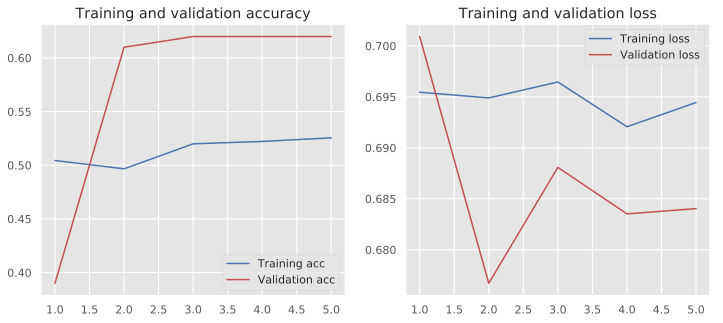

In [949]:
plot_history(history)

# 9)- Checking our best model for evaluation 

In [0]:
from sklearn.ensemble import RandomForestClassifier

In [0]:
rf = RandomForestClassifier(n_estimators=100, n_jobs=-1, random_state=42, 
                            class_weight='balanced')

In [0]:
parameters = {'max_features': [1, 2, 4], 'min_samples_leaf': [3, 5, 7, 9], 'max_depth': [5,10,15]}

In [901]:
%%time
rf_grid_search = GridSearchCV(rf, parameters, n_jobs=-1, scoring='recall', cv=skf, verbose=True)
rf_grid_search = rf_grid_search.fit(X_train, y_train)


Fitting 5 folds for each of 36 candidates, totalling 180 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  46 tasks      | elapsed:    6.0s
[Parallel(n_jobs=-1)]: Done 180 out of 180 | elapsed:   24.8s finished


CPU times: user 868 ms, sys: 63.7 ms, total: 932 ms
Wall time: 25 s


In [902]:
# Recall
print(rf_grid_search.best_score_)

0.838


In [903]:
rf_grid_search.best_estimator_

RandomForestClassifier(bootstrap=True, class_weight='balanced',
                       criterion='gini', max_depth=15, max_features=4,
                       max_leaf_nodes=None, min_impurity_decrease=0.0,
                       min_impurity_split=None, min_samples_leaf=3,
                       min_samples_split=2, min_weight_fraction_leaf=0.0,
                       n_estimators=100, n_jobs=-1, oob_score=False,
                       random_state=42, verbose=0, warm_start=False)

In [904]:
pd.DataFrame({'feat': independent_columns_names,
              'coef': rf_grid_search.best_estimator_.feature_importances_}).sort_values(by='coef', ascending=False)

,feat,coef
1,"(M, i, n, u, t, e, s, ., i, n, ., 2, 0, 1, 8)",0.301427
9,"(M, o, n, t, h, l, y, S, u, b, s, c, r, i, p, ...",0.157654
2,"(N, u, m, b, e, r, ., o, f, ., S, M, S)",0.129080
4,"(T, o, t, a, l, ., U, n, i, q, u, e, ., C, a, ...",0.105093
3,"(K, B, s, ., u, s, e, d)",0.078307
0,"(M, o, n, t, h, s, ., c, u, s, t, o, m, e, r)",0.065698
5,"(C, u, s, t, o, m, e, r, ., A, g, e)",0.040250
7,"(E, n, d, S, u, b, s, c, r, i, p, t, i, o, n)",0.032431
8,"(T, o, t, a, l, ., C, a, l, l, ., c, e, n, t, ...",0.029095
6,"(L, o, g, i, n, s, S, i, t, e, ., L, a, s, t, ...",0.027258


In [0]:
y_true, y_pred = y_test, rf_grid_search.predict(X_test)

In [906]:
print(y_true[:5])

198    1
328    1
45     1
263    0
621    0
Name: Churn.Status, dtype: int64


In [907]:
y_pred[:5]

array([0, 0, 0, 0, 1])

In [908]:
print(metrics.confusion_matrix(y_test, y_pred))

[[89 20]
 [22 69]]


In [909]:
print(classification_report(y_true, y_pred))

              precision    recall  f1-score   support

           0       0.80      0.82      0.81       109
           1       0.78      0.76      0.77        91

    accuracy                           0.79       200
   macro avg       0.79      0.79      0.79       200
weighted avg       0.79      0.79      0.79       200



In [910]:
print(recall_score(y_true, y_pred))

0.7582417582417582


### predict_proba


In [911]:
rf_grid_search.predict_proba(X_test)[0:10, :]

array([[0.68365904, 0.31634096],
       [0.68999808, 0.31000192],
       [0.66942271, 0.33057729],
       [0.87161346, 0.12838654],
       [0.11158225, 0.88841775],
       [0.1464118 , 0.8535882 ],
       [0.65146358, 0.34853642],
       [0.95872619, 0.04127381],
       [0.12228571, 0.87771429],
       [0.78023869, 0.21976131]])

In [912]:
pred_prob_zero = rf_grid_search.predict_proba(X_test)[:, 0]
print(pred_prob_zero[:5])

[0.68365904 0.68999808 0.66942271 0.87161346 0.11158225]


Text(0, 0.5, 'Frequency')

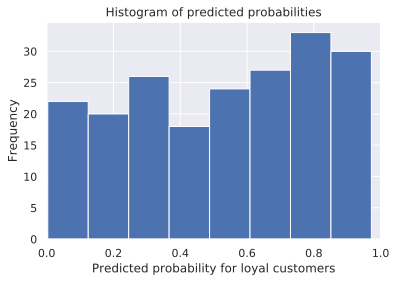

In [913]:
# histogram of predicted probabilities for loyal ones
plt.hist(pred_prob_zero, bins=8)
plt.xlim(0, 1)
plt.title('Histogram of predicted probabilities')
plt.xlabel('Predicted probability for loyal customers')
plt.ylabel('Frequency')

In [914]:
pred_prob_cl_one = rf_grid_search.predict_proba(X_test)[:, 1]
print(pred_prob_cl_one[:5])

[0.31634096 0.31000192 0.33057729 0.12838654 0.88841775]


Text(0, 0.5, 'Frequency')

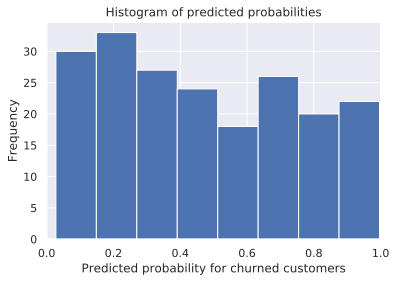

In [915]:
# histogram of predicted probabilities for churned customers
plt.hist(pred_prob_cl_one, bins=8)
plt.xlim(0, 1)
plt.title('Histogram of predicted probabilities')
plt.xlabel('Predicted probability for churned customers')
plt.ylabel('Frequency')

**These are the probabilities that for churned and loyal customers.**

In [0]:
from sklearn.metrics import roc_curve
roc_score=roc_curve(y_test, pred_prob_cl_one)

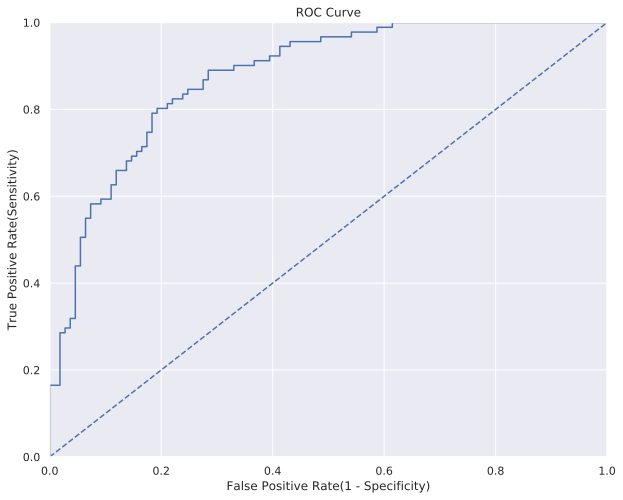

In [917]:
# Representing roc_curve
from sklearn.metrics import roc_curve
fpr, tpr, thres = roc_curve(y_test, pred_prob_cl_one)


def _plot_roc_curve(fpr, tpr, thres):
    roc = plt.figure(figsize = (10, 8))
    plt.plot(fpr, tpr, 'b-', label = 'ROC')
    plt.plot([0, 1], [0, 1], '--')
    plt.axis([0, 1, 0, 1])
    plt.xlabel('False Positive Rate(1 - Specificity)')
    plt.ylabel('True Positive Rate(Sensitivity)')
    plt.title('ROC Curve')
    return roc
p1 = _plot_roc_curve(fpr, tpr, thres)

In [918]:
from sklearn.metrics import auc
auc(fpr, tpr)

0.8769029136001614

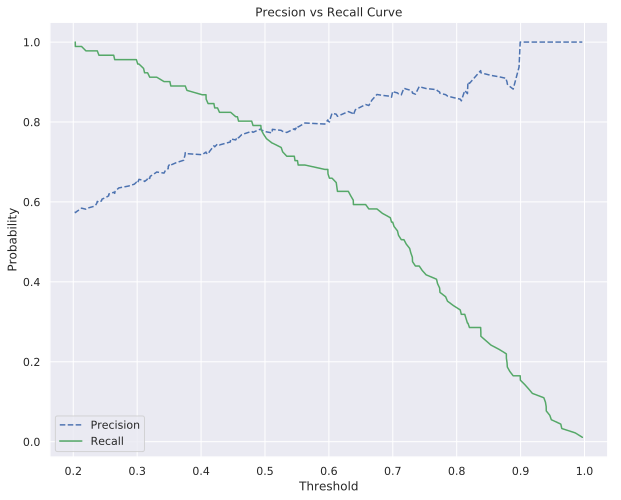

In [919]:
from sklearn.metrics import roc_curve, precision_recall_curve
prec, rec, thres = precision_recall_curve(y_test, pred_prob_cl_one)

def _plot_prec_rec_curve(prec, rec, thres):
    plot_pr = plt.figure(figsize = (10, 8))
    plt.plot(thres, prec[:-1], 'b--', label = 'Precision')
    plt.plot(thres, rec[:-1], 'g-', label = 'Recall')
    plt.xlabel('Threshold')
    plt.ylabel('Probability')
    plt.title('Precsion vs Recall Curve')
    plt.legend()
    #return plot_pr(it creates duplicate graph)

_plot_prec_rec_curve(prec, rec, thres)

# 10)- Summary 


In [973]:
models = pd.DataFrame({
    'Model': ['Simple Logistic Model', 'Decison Tree', 'SVC', 'Random Forest','Naive-Bayes','K-Nearest Neighbor',
              'Simple Neural Network', 'Tensorflow NN',],
    'Recall-Score': [log_score, gird_log_score, svc_score, rf_score,nb_score,knn_score,
                     NN_score, tf_score]})
models.sort_values(by='Recall-Score', ascending=False)

,Model,Recall-Score
3,Random Forest,0.747253
2,SVC,0.714286
0,Simple Logistic Model,0.705600
1,Decison Tree,0.705600
6,Simple Neural Network,0.703297
4,Naive-Bayes,0.681319
7,Tensorflow NN,0.670330
5,K-Nearest Neighbor,0.626374


# 11)- Submission

cust-id, y_pred, pred_prob_c1-one 

In [0]:
submission = pd.DataFrame({
        "Customer_Id": cust_id,
        "Customer_Churn ": y_pred,
        "Churn_Probability":pred_prob_cl_one
    })
submission.to_csv('submission.csv', index=False)

# 12)-Bonus

In [567]:
rf_grid_search.predict_proba(X_test)[0:10, :]

array([[0.68365904, 0.31634096],
       [0.68999808, 0.31000192],
       [0.66942271, 0.33057729],
       [0.87161346, 0.12838654],
       [0.11158225, 0.88841775],
       [0.1464118 , 0.8535882 ],
       [0.65146358, 0.34853642],
       [0.95872619, 0.04127381],
       [0.12228571, 0.87771429],
       [0.78023869, 0.21976131]])

In [586]:
pred_prob_cl_one = rf_grid_search.predict_proba(X_test)[:, 1]
print(pred_prob_cl_one[:5])

[0.31634096 0.31000192 0.33057729 0.12838654 0.88841775]


Text(0, 0.5, 'Frequency')

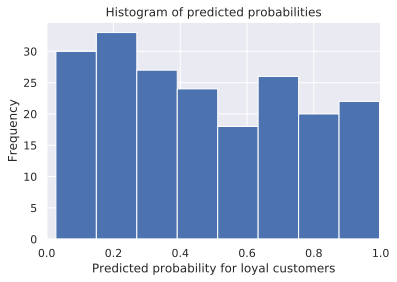

**Decrease the threshold for predicting classes in order to increase the sensitivity of the classifier**

In [0]:
from sklearn.preprocessing import binarize
y_pred_class = binarize([pred_prob_cl_one], 0.3)[0]

In [589]:
y_pred_class[:5]

array([1., 1., 1., 0., 1.])

In [590]:
pred_prob_cl_one[:5]

array([0.31634096, 0.31000192, 0.33057729, 0.12838654, 0.88841775])

In [597]:
# Old model with 0.5 threshold
print(metrics.confusion_matrix(y_test, y_pred))

[[89 20]
 [22 69]]


In [591]:
# New model with 0.3 threshold value
print(metrics.confusion_matrix(y_test, y_pred_class))

[[62 47]
 [ 5 86]]


In [594]:
# 0.5 value
print(recall_score(y_true, y_pred))

0.7582417582417582


In [595]:
# 0.3 value
print(recall_score(y_test, y_pred_class))

0.945054945054945
